In [1]:
%load_ext autoreload
import sys
sys.path.append("../..")

In [2]:
%matplotlib inline


Bad key "legend.title_fontsize" on line 41 in
/Users/gridgway/Desktop/DM/DarkHistory/examples/21cm_pwave_notebooks/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

import numpy as np

import darkhistory.physics as phys

import main_dm_baryon_scattering as main

from tqdm import tqdm_notebook as tqdm

import pickle


Bad key "legend.title_fontsize" on line 41 in
matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [159]:
import config
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

decay_elec_CMB_raw = np.loadtxt(config.data_path+'/CMB_limits_elec_decay.csv', delimiter=',')
decay_phot_CMB_raw = np.loadtxt(config.data_path+'/CMB_limits_phot_decay.csv', delimiter=',')

decay_elec_CMB = interp1d(np.transpose(decay_elec_CMB_raw)[0,:], np.transpose(decay_elec_CMB_raw)[1,:])
decay_phot_CMB = interp1d(np.transpose(decay_phot_CMB_raw)[0,:], np.transpose(decay_phot_CMB_raw)[1,:])

def xsec_bound_elec_CMB(mDM, DM_process):
    if DM_process == 'swave':
        return 4.1e-28*(mDM*1e-9)/f_elec_CMB(np.log10(mDM-phys.me), np.log10(601))[0]
    elif DM_process == 'decay':
        return np.array([decay_elec_CMB(mDM*1e-9)])[0]

def xsec_bound_phot_CMB(mDM, DM_process):
    if DM_process == 'swave':
        return 4.1e-28*(mDM*1e-9)/f_phot_CMB(np.log10(mDM), np.log10(601))[0]
    elif DM_process == 'decay':
        return np.array([decay_phot_CMB(mDM*1e-9)])[0]

In [54]:
struct_func = phys.struct_boost_func(model='pwave_NFW_no_subs')
DH_run = main.evolve(
            primary = 'phot_delta',
            DM_process='pwave', mDM=1e9, lifetime=3e25, sigmav=3e-23,
            start_rs = 3000, end_rs=4.004,
            coarsen_factor=4, backreaction=False,
            struct_boost=struct_func
        )

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/Users/gridgway/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/gridgway/anaconda3/lib/python3.6/site-packages/tqdm-4.19.5-py3.6.egg/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/gridgway/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [62]:
%autoreload
rs_vec = 3000*np.exp(-.004 * np.arange(0,1655))
tmp = tla.get_history(
    rs_vec, baseline_f=True,
    inj_particle='phot',
    DM_process='pwave', mDM=1e9, sigmav=3e-23,
    struct_boost=struct_func
)

/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


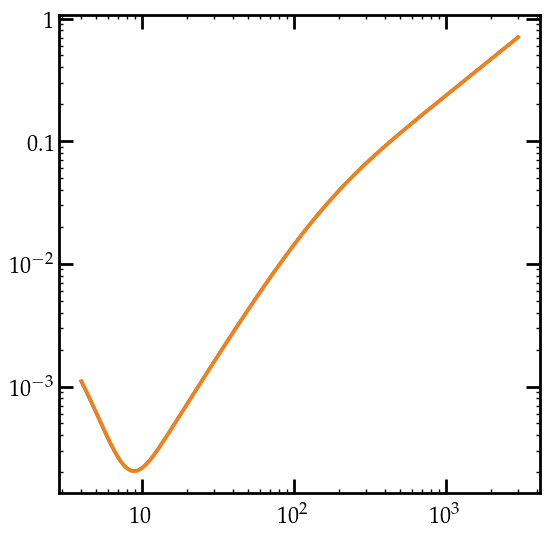

In [63]:
plt.figure()
ax=plt.gca()
ax.loglog()

# plt.plot(rs_vec,tmp[:,0]/DH_run['Tm'])
plt.plot(rs_vec,tmp[:,0])
plt.plot(rs_vec,DH_run['Tm'])
plt.show()

/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


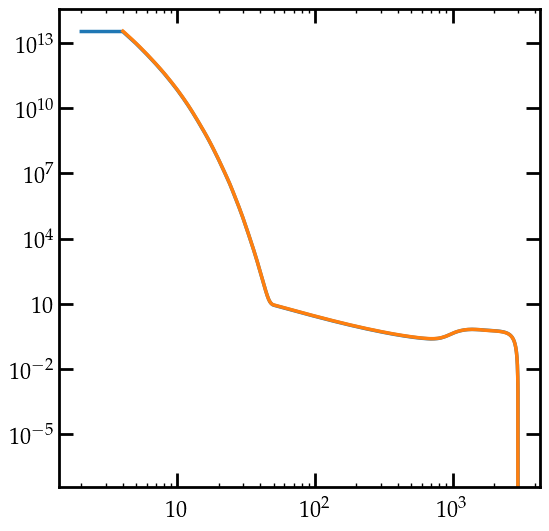

In [17]:
plt.figure()
ax=plt.gca()
ax.loglog()
rs_vec = np.arange(3000,1,-1)
plt.plot(rs_vec,phys.f_std(1e9,rs_vec,'phot','pwave',True,'heat'))
plt.plot(DH_run['rs'],DH_run['f']['low']['heat']+DH_run['f']['high']['heat'])
plt.show()

## Structure Formation

Dark matter annihilation rates are significantly enhanced after the formation of structures, owing to the fact that $\langle \rho^2 \rangle$ becomes greater than $\langle \rho_\text{DM} \rangle^2$, where $\rho_\text{DM}$ is the mass density of dark matter. To account for this increase in annihilation rate, boost factors, defined as

$$ 1 + \mathcal{B}(z) \equiv \frac{\langle \rho_\text{DM}^2 \rangle}{\langle \rho_\text{DM} \rangle^2} $$

have been computed under a wide variety of assumptions in the literature. The boost factor allows us to write the energy injection rate as

$$ \left( \frac{dE}{dV \, dt} \right)^\text{inj} = [1 + \mathcal{B}(z)] \left( \frac{dE}{dV \, dt} \right)^\text{inj}_\text{smooth} \,,$$

where the subscript 'smooth' indicates the smooth energy injection rate with the average mass density of dark matter assumed. 

In DarkHistory, we provide the 4 $s$-wave boost factors calculated in [[1]](#cite_2016), and shown in Fig. 2. We also include the $\text{erfc}$ model provided in [[2]](#cite_erfc), Eq. (2.7). The user can obtain these boost factors as *functions* that themselves return $1 + \mathcal{B}(z)$ as a function of redshift $1+z$, using [*struct_boost_func()*](https://darkhistory.readthedocs.io/en/master/_autosummary/darkhistory/physics/darkhistory.physics.struct_boost_func.html) in [*physics*](https://darkhistory.readthedocs.io/en/master/_autosummary/darkhistory/physics). See the documentation for details on how to use this function. Below, we use the "Einasto with substructure" model in [[1]](#cite_2016).

In [5]:
struct_boost = phys.struct_boost_func(model='einasto_subs')
struct_boost_NFW = phys.struct_boost_func(model='NFW_no_subs')
struct_boost_pwave = phys.struct_boost_func(model='pwave_NFW_no_subs')

Let's plot this structure formation prescription to make sure that we have the right behavior. We'll make a plot of the effective density

$$ \rho_\text{eff} \equiv \sqrt{1 + \mathcal{B}(z)} \langle \rho_\text{DM} \rangle =  \sqrt{1 + \mathcal{B}(z)} \rho_{\text{DM},0} (1+z)^3 $$

where $\rho_{\text{DM},0}$ is the dark matter density today, which is stored in [*physics.rho_DM()*](https://darkhistory.readthedocs.io/en/master/_autosummary/darkhistory/physics/darkhistory.physics.rho_DM.html). 

This plot should be directly compared with [[1]](#cite_2016). 

/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


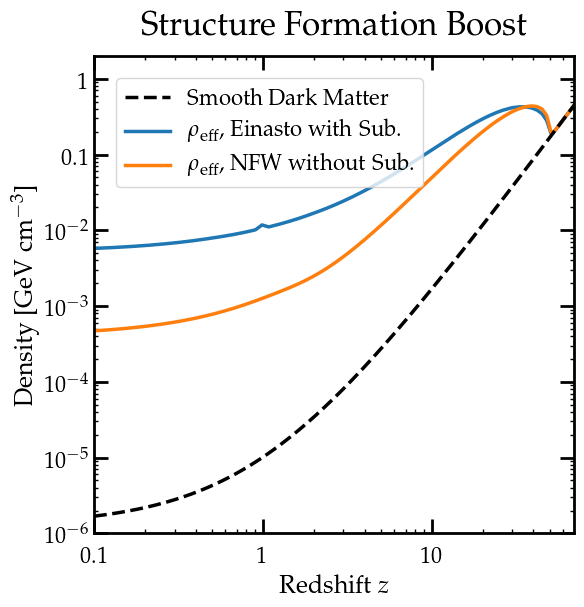

In [6]:
plt.figure()

plt.loglog()

z_vec = 10**np.arange(-1, 2, 0.005)
# Note that struct_boost accepts 1+z as the argument, which is the default
# way in which we pass redshift to functions in DarkHistory. 
rho_eff_vec = np.sqrt(struct_boost(1+z_vec)) * phys.rho_DM * (1+z_vec)**3 
rho_eff_vec_NFW = np.sqrt(struct_boost_NFW(1+z_vec)) * phys.rho_DM * (1+z_vec)**3 

# Convert to GeV/cm^3
rho_eff_vec /= 1e9
rho_eff_vec_NFW /= 1e9

rho_eff_plot,    = plt.plot(z_vec, rho_eff_vec, label=r'$\rho_\mathrm{eff}$, Einasto with Sub.')
rho_eff_plot_NFW,    = plt.plot(z_vec, rho_eff_vec_NFW, label=r'$\rho_\mathrm{eff}$, NFW without Sub.')
smooth_rho_plot, = plt.plot(z_vec, phys.rho_DM * (1+z_vec)**3 / 1e9, 'k--', label=r'Smooth Dark Matter')

plt.axis([0.1, 70, 1e-6, 2])
plt.xlabel('Redshift $z$')
plt.ylabel(r'Density [GeV cm$^{-3}$]')
plt.title('Structure Formation Boost')

plt.legend(handles=[smooth_rho_plot, rho_eff_plot, rho_eff_plot_NFW])
plt.show()

/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


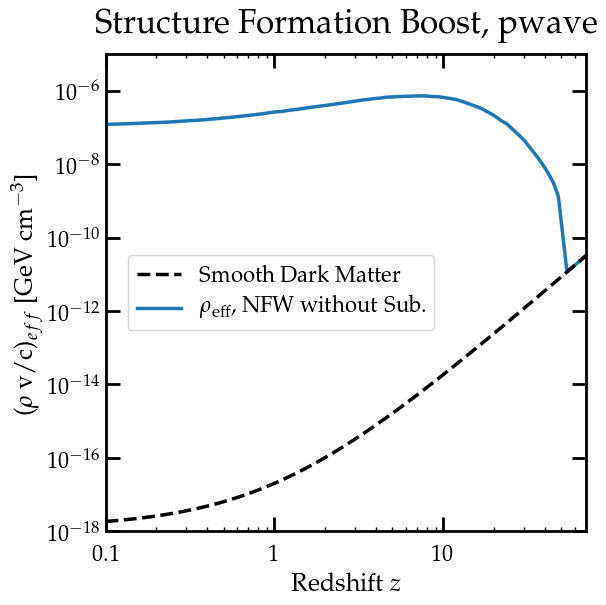

In [7]:
plt.figure()

plt.loglog()

z_vec = 10**np.arange(-1, 2, 0.005)

sigma_1D_B = 1e-11*phys.c*(1/100)**0.5
rho_eff_vec_NFW = (sigma_1D_B/phys.c) * phys.rho_DM * (1+z_vec)**4 * np.sqrt(struct_boost_pwave(1+z_vec))

# Convert to GeV/cm^3
rho_eff_vec_NFW /= 1e9

# rho_eff_plot,    = plt.plot(z_vec, rho_eff_vec, label=r'$\rho_\mathrm{eff}$, Einasto with Sub.')
rho_eff_plot_NFW,    = plt.plot(z_vec, rho_eff_vec_NFW, label=r'$\rho_\mathrm{eff}$, NFW without Sub.')
smooth_rho_plot, = plt.plot(z_vec, 
                            (sigma_1D_B/phys.c) * phys.rho_DM * (1+z_vec)**4 / 1e9, 
                            'k--', label=r'Smooth Dark Matter')

plt.axis([0.1, 70, 1e-18, 1e-5])
plt.xlabel('Redshift $z$')
plt.ylabel(r'($\rho$ v/c)$_{eff}$ [GeV cm$^{-3}$]')
plt.title('Structure Formation Boost, pwave')

plt.legend(handles=[smooth_rho_plot, rho_eff_plot_NFW])
plt.show()

# pwave histories to compare against 1604.02457

In [8]:
%autoreload
withBR = False

pwave_noBR = main.evolve(
    DM_process='pwave', mDM=1e8, sigmav=3e-24, primary='phot_delta',
    start_rs = 3000.,
    coarsen_factor=4, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=4.004, dm_baryon_switch=False, fDM=1
)
if withBR:
    pwave_24BR = main.evolve(
        DM_process='pwave', mDM=1e8, sigmav=3e-24, primary='phot_delta',
        start_rs = 3000.,
        coarsen_factor=4, backreaction=True,
        struct_boost=struct_boost_pwave,
        end_rs=4.004
    )

****** Loading transfer functions... ******
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


In [ ]:
%autoreload
pwave23 = main.evolve(
    DM_process='pwave', mDM=1e8, sigmav=3e-23, primary='phot_delta',
    start_rs = 3000.,
    coarsen_factor=4, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=4.004, dm_baryon_switch=False, fDM=1
)
if withBR:
    pwave_23BR = main.evolve(
        DM_process='pwave', mDM=1e8, sigmav=3e-23, primary='phot_delta',
        start_rs = 3000.,
        coarsen_factor=4, backreaction=True,
        struct_boost=struct_boost_pwave,
        end_rs=4.004
    )

In [ ]:
%autoreload
pwave22 = main.evolve(
    DM_process='pwave', mDM=1e8, sigmav=3e-22, primary='phot_delta',
    start_rs = 3000.,
    coarsen_factor=4, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=4.004, dm_baryon_switch=False, fDM=1
)
if withBR:
    pwave_22BR = main.evolve(
        DM_process='pwave', mDM=1e8, sigmav=3e-22, primary='phot_delta',
        start_rs = 3000.,
        coarsen_factor=4, backreaction=True,
        struct_boost=struct_boost_pwave,
        end_rs=4.004
    )

Now let's make a plot comparing these two results. Pull out the relevant information first:

In [ ]:
# Redshift abscissa. Identical for both cases. 
rs_vec = pwave_noBR['rs']

# Tm, stored in eV and converted to K. 
Tm24 = pwave_noBR['Tm']/phys.kB
Tm23 = pwave23['Tm']/phys.kB
Tm22 = pwave22['Tm']/phys.kB

# xHII. 
xHII24 = pwave_noBR['x'][:,0]
xHII23 = pwave23['x'][:,0]
xHII22 = pwave22['x'][:,0]

if withBR:
    Tm24BR = pwave_24BR['Tm']/phys.kB
    Tm23BR = pwave_23BR['Tm']/phys.kB
    Tm22BR = pwave_22BR['Tm']/phys.kB
    # Tm_BR   = bbbar_BR['Tm']/phys.kB
    
    xHII24BR = pwave_noBR['x'][:,0]
    xHII23BR = pwave_23BR['x'][:,0]
    xHII22BR = pwave_22BR['x'][:,0]
    # xHII_BR   = bbbar_BR['x'][:,0]

And now the plotting!

In [ ]:
fig_bbbar = plt.figure(figsize=(15,6.5))

ax = plt.subplot(1,2,1)

ax.loglog()

plot_Tm_std,    = plt.plot(rs_vec, phys.Tm_std(rs_vec)/phys.kB, 'C0', label='Baseline')
plot_TCMB, = plt.plot(rs_vec, phys.TCMB(rs_vec)/phys.kB, 'k--', label='TCMB')
plot_Tm24,   = plt.plot(rs_vec, Tm24, 'C1', label='$(\sigma v)_{ref}$ = $3 \\times 10^{-24}$')
plot_Tm23,   = plt.plot(rs_vec, Tm23, 'C2', label='$(\sigma v)_{ref}$ = $3 \\times 10^{-23}$')
plot_Tm22,   = plt.plot(rs_vec, Tm22, 'C3', label='$(\sigma v)_{ref}$ = $3 \\times 10^{-22}$')

if withBR:
    plot_Tm24BR,   = plt.plot(rs_vec, Tm24BR, 'C1--', label='$(\sigma v)_{ref}$ = $3 \\times 10^{-24}$')
    plot_Tm23BR,   = plt.plot(rs_vec, Tm23BR, 'C2--', label='$(\sigma v)_{ref}$ = $3 \\times 10^{-23}$')
    plot_Tm22BR,   = plt.plot(rs_vec, Tm22BR, 'C3--', label='$(\sigma v)_{ref}$ = $3 \\times 10^{-22}$')

plt.title(r'\bf{Temperature History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')

plt.axis([5, 2e3, 1, 1e4])

# Text
plt.text(0.06, 0.88, r'$\chi \chi \to \gamma \gamma$, $m_\chi$ = 100 GeV', fontsize=20, transform=ax.transAxes)

if withBR:
    leg = plt.legend(handles=[plot_TCMB, plot_Tm_std, plot_Tm24, plot_Tm23, plot_Tm22,
                              plot_Tm24BR, plot_Tm23BR, plot_Tm22BR], loc=4)
else:
    leg = plt.legend(handles=[plot_TCMB, plot_Tm_std, plot_Tm24, plot_Tm23, plot_Tm22], loc=4)

#################

ax = plt.subplot(1,2,2)

ax.loglog()

plot_xHII24,   = plt.plot(rs_vec, xHII24, 'C1', label='$(\sigma v)_{ref}$ = $3 \\times 10^{-24}$')
plot_xHII23,   = plt.plot(rs_vec, xHII23, 'C2', label='$(\sigma v)_{ref}$ = $3 \\times 10^{-23}$')
plot_xHII22,   = plt.plot(rs_vec, xHII22, 'C3', label='$(\sigma v)_{ref}$ = $3 \\times 10^{-22}$')

if withBR:
    plot_xHII24BR,   = plt.plot(rs_vec, xHII24BR, 'C1--')
    plot_xHII23BR,   = plt.plot(rs_vec, xHII23BR, 'C2--')
    plot_xHII22BR,   = plt.plot(rs_vec, xHII22BR, 'C3--')
    
plot_xHII_std,    = plt.plot(rs_vec, phys.xHII_std(rs_vec), 'C0', label='Baseline')

plt.title(r'\bf{Ionization History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Hydrogen Ionization Fraction $x_\mathrm{HII}$')

plt.axis([6, 2e3, 1e-4, 1.1])

# Text
plt.text(0.06, 0.88, r'$\chi \chi \to \gamma \gamma$, $m_\chi$ = 100 GeV', fontsize=20, transform=ax.transAxes) 

if withBR:
    leg = plt.legend(handles=[plot_xHII_std, plot_xHII24, plot_xHII23, plot_xHII22, 
                             plot_xHII24BR, plot_xHII23BR, plot_xHII22BR], loc=4)
else:
    leg = plt.legend(handles=[plot_xHII_std, plot_xHII24, plot_xHII23, plot_xHII22], loc=4)
    
plt.show()

In [17]:
%autoreload
tmp = main.evolve(
    DM_process='pwave', mDM=1e8, sigmav=3e-22, primary='phot_delta',
    start_rs = 1000.,
    coarsen_factor=4, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=5, dm_baryon_switch=False, fDM=1, z_td=500
)

/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


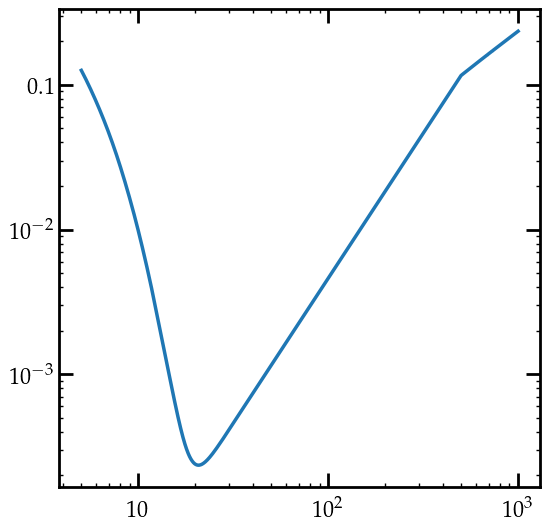

In [18]:
plt.figure()
ax=plt.gca()
ax.loglog()
plt.plot(tmp['rs'], tmp['Tm'])
plt.show()

# Compare to Fig. 1 of Hongwan/Tracy 21cm paper (also Histories_for_Comparison.ipynb)

Can we reproduce Fig. 1 of Hongwan/Tracy's 2016 paper? (Compare to Dropbox (MIT)/21cm_pwave/.../Example_Histories.ipynb)

In [44]:
%autoreload
mDM = 1e8
fDM = 1
n = -4

# real scattering cross section is xsec*v**-n/mu**2
mu_p = mDM*1.22*phys.mp/(mDM + 1.22*phys.mp)
xsec = 3e-43*mu_p**2
inj_type = 'swave'
inj_param = 1e-29

rs_start = 3000
rs_vec = 1 + np.arange(0,rs_start-0.5,0.5)
rs_vec = np.flipud(rs_vec)

V_pec_0 = 3e-4*0

init_cond = [phys.TCMB(rs_start), 0, V_pec_0,  .99999]

soln_std = main.evolve(
    DM_process='swave', mDM=mDM, sigmav=inj_param*1e-60, primary='phot_delta',
    start_rs = rs_start,
    coarsen_factor=4, backreaction=False,
    struct_boost=None,
    end_rs=4.004,
    dm_baryon_switch=False, xsec=0, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [45]:
%autoreload
mDM = 1e8
fDM = 1
n = -4

# real scattering cross section is xsec*v**-n/mu**2
mu_p = mDM*1.22*phys.mp/(mDM + 1.22*phys.mp)
xsec = 3e-43*mu_p**2
inj_type = 'swave'
inj_param = 1e-29

rs_start = 3000
rs_vec = 1 + np.arange(0,rs_start-0.5,0.5)
rs_vec = np.flipud(rs_vec)

V_pec_0 = 3e-4*0

init_cond = [phys.TCMB(rs_start), 0, V_pec_0,  .99999]

# real scattering cross section is xsec*v**-n/mu**2
mu_p = mDM*1.22*phys.mp/(mDM + 1.22*phys.mp)
xsec = 3e-43*mu_p**2
soln_cooling = main.evolve(
    DM_process='swave', mDM=mDM, sigmav=1e-40, primary='phot_delta',
    start_rs = rs_start, reion_switch=False,
    coarsen_factor=4, backreaction=False,
    struct_boost=None,
    end_rs=4.004,
    dm_baryon_switch=True, xsec=xsec, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [53]:
inj_param = 1e-29
mDM=1e8
soln_swave = main.evolve(
    DM_process='swave', mDM=mDM, sigmav=inj_param, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=struct_boost_NFW,
    end_rs=4.004,
    dm_baryon_switch=False, xsec=0, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [55]:
%autoreload
mDM = 1e8
fDM = 1
n = -4

# real scattering cross section is xsec*v**-n/mu**2
mu_p = mDM*1.22*phys.mp/(mDM + 1.22*phys.mp)
xsec = 3e-43*mu_p**2

rs_start = 3000
rs_vec = 1 + np.arange(0,rs_start-0.5,0.5)
rs_vec = np.flipud(rs_vec)

V_pec_0 = 3e-4*0

init_cond = [phys.TCMB(rs_start), 0, V_pec_0,  .99999]



# mDM=3e6
# lifetime = 8e25
lifetime = 1e28
soln_decay = main.evolve(
    DM_process='decay', mDM=mDM, lifetime=lifetime, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=None,
    end_rs=4.004,
    dm_baryon_switch=False, xsec=0, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x12ea37550> has a label of '_line2' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


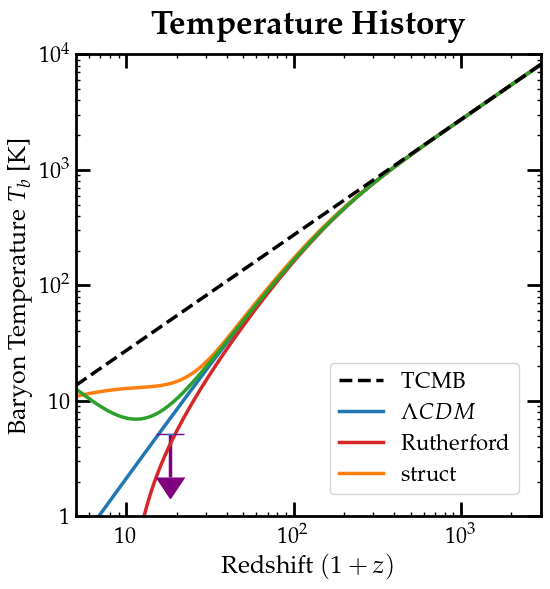

In [56]:
plt.figure(figsize=(6,6))
ax = plt.gca()

ax.loglog()

plot_Tm_std,    = plt.plot(soln_std['rs'], soln_std['Tm']/phys.kB, 'C0', label='$\Lambda CDM$')
# plot_TDM_std,    = plt.plot(soln_std['rs'], soln_std['T_DM']/phys.kB, 'C0', linestyle = '--')

plot_Tm_cooling,    = plt.plot(soln_cooling['rs'], soln_cooling['Tm']/phys.kB, 'C3', label='Rutherford')
plot_TDM_cooling,    = plt.plot(soln_cooling['rs'], soln_cooling['T_DM']/phys.kB, 'C3', linestyle = '--')

plot_Tm_swave,    = plt.plot(soln_swave['rs'], soln_swave['Tm']/phys.kB, 'C1', label='struct')

# plot_Tm_boost,    = plt.plot(soln_thermal_boost['rs'], soln_thermal_boost['Tm']/phys.kB, 'C2', label='cooling+boost', linestyle=':')
# plot_TDM_boost,    = plt.plot(soln_thermal_boost['rs'], soln_thermal_boost['T_DM']/phys.kB, 'C2', linestyle = '--')

# plot_Tm_pwave,    = plt.plot(soln_pwave['rs'], soln_pwave['Tm']/phys.kB, 'C3', label='struct')

# plot_Tm_pwave_cooling,    = plt.plot(soln_pwave_cooling['rs'], soln_pwave_cooling['Tm']/phys.kB, 'C4', label='struct+pwave-boost')
# plot_TDM_pwave_cooling,    = plt.plot(soln_pwave_cooling['rs'], soln_pwave_cooling['T_DM']/phys.kB, 'C4', linestyle = '--')

# plot_Tm_total,    = plt.plot(soln_total['rs'], soln_total2['Tm']/phys.kB, 'C5', label='total', linestyle=':')
# plot_TDM_total,    = plt.plot(soln_total['rs'], soln_total2['T_DM']/phys.kB, 'C5', linestyle = '--')

plot_Tm_decay,    = plt.plot(soln_decay['rs'], soln_decay['Tm']/phys.kB, 'C2', label='decay')
# plot_Tm_decayBR,    = plt.plot(soln_decayBR['rs'], soln_decayBR['Tm']/phys.kB, 'C2--', label='decay w/ BR')

# TDM_boost2, = plt.plot(tmp2['rs'], tmp2['T_DM']/phys.kB, color='C1', linestyle='--', label=r'DM')
# Tm_boost2, = plt.plot(tmp2['rs'], tmp2['Tm']/phys.kB, color='C3', linestyle='--', label=r'Struct Boost')
plt.errorbar([18.2], [5.2], fmt="_", capsize=10, yerr=3, uplims=True, ecolor='Purple', linewidth=2.5)

plot_TCMB, = plt.plot(rs_vec, phys.TCMB(rs_vec)/phys.kB, 'k--', label='TCMB')

plt.title(r'\bf{Temperature History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Baryon Temperature $T_b$ [K]')

plt.axis([5, 3e3, 1, 1e4]) 


# leg = plt.legend(handles=[plot_TCMB, plot_Tm_std], loc=4)
leg = plt.legend(handles=
                 [plot_TCMB, plot_Tm_std, plot_Tm_cooling, plot_TDM_cooling, plot_Tm_swave], loc=4)# plot_Tm_boost, 
                  #plot_Tm_pwave, plot_Tm_pwave_cooling, plot_Tm_total], loc=4)

# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/standard_hist.pdf')
# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/decay_example.pdf')
# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/decayBR_example.pdf')
# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/21cm_constraint.pdf')

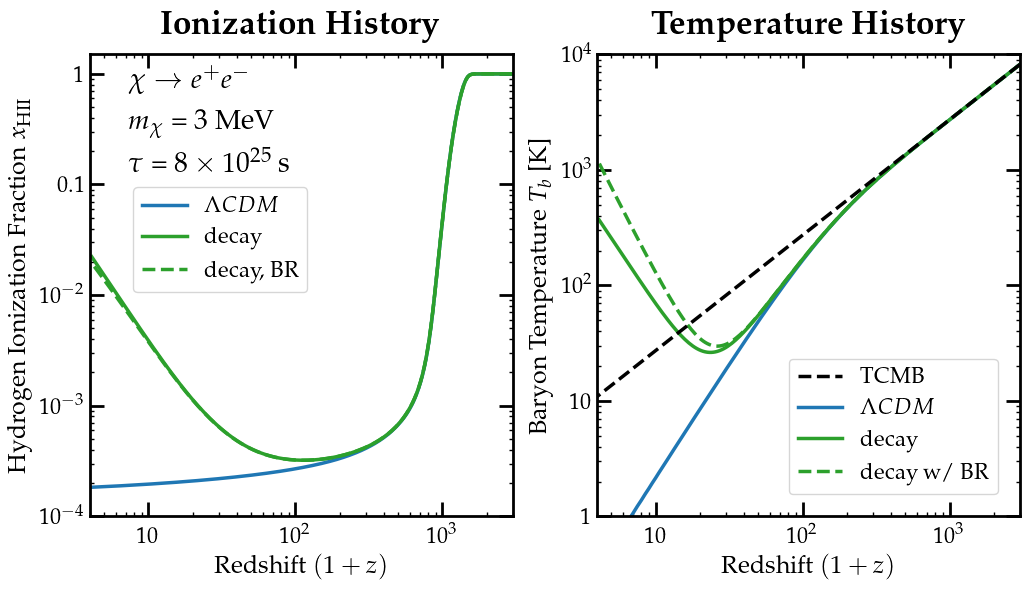

In [66]:
rs_start = 3000
rs_vec = 1 + np.arange(0,rs_start-0.5,0.5)
rs_vec = np.flipud(rs_vec)
plt.figure(figsize=(12,6))
ax = plt.gca()
ax.loglog()

ax = plt.subplot(1,2,1)

ax.loglog()

plot_xHII_std,    = plt.plot(rs_vec, phys.xHII_std(rs_vec), 'C0', label='$\Lambda CDM$')
# plot_xHII_swave,    = plt.plot(soln_swave_NFW['rs'], soln_swave_NFW['x'][:,0], 'C1', label='s-wave annihilation')
plot_xHII_decay,    = plt.plot(soln_decay['rs'], soln_decay['x'][:,0], 'C2', label='decay')
plot_xHII_decayBR,    = plt.plot(soln_decayBR['rs'], soln_decayBR['x'][:,0], 'C2--', label='decay, BR')



plt.title(r'\bf{Ionization History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Hydrogen Ionization Fraction $x_\mathrm{HII}$')

plt.axis([4, 3e3, 1e-4, 1.5])

# Text
interval = .08
plt.text(0.09, 0.93, r'$\chi \to e^+ e^-$', fontsize=20, transform=ax.transAxes) 
plt.text(0.09, 0.93-interval-.02, r'$m_\chi$ = 3 MeV', fontsize=20, transform=ax.transAxes) 
# # plt.text(0.06, 0.88-interval*2-.02, r'$\langle \sigma v \rangle$ = $10^{-29}$ cm$^3$s$^{-1}$', fontsize=20, transform=ax.transAxes) 
plt.text(0.09, 0.93-interval*2-.02, r'$\tau$ = $8 \times 10^{25}$ s', fontsize=20, transform=ax.transAxes)

# Text
# plt.text(0.06, 0.88, r'$\chi \chi \to \gamma \gamma$, $m_\chi$ = 100 GeV', fontsize=20, transform=ax.transAxes) 
# plt.text(0.06, 0.82, r'$\langle \sigma v \rangle = 3 \times 10^{-24}$ cm$^3$ s$^{-1}$', fontsize=20, transform=ax.transAxes) 

leg = plt.legend(handles=[plot_xHII_std, plot_xHII_decay, plot_xHII_decayBR], loc="upper left", bbox_to_anchor=(0.05,0.76))
# leg = plt.legend(handles=[plot_xHII_std], loc="upper left", bbox_to_anchor=(0.05,0.76))


#################

ax = plt.subplot(1,2,2)

ax.loglog()

plot_Tm_std,    = plt.plot(rs_vec, phys.Tm_std(rs_vec)/phys.kB, 'C0', label='$\Lambda CDM$')
# plot_Tm_swave,    = plt.plot(soln_swave_NFW['rs'], soln_swave_NFW['Tm']/phys.kB, 'C1', label='s-wave annihilation')
# plot_Tm_BR,    = plt.plot(soln_swave_BR['rs'], soln_swave_BR['Tm']/phys.kB, 'C1', linestyle='--',label='s-wave, w/ backreaction')

plot_Tm_decay,    = plt.plot(soln_decay['rs'], soln_decay['Tm']/phys.kB, 'C2', label='decay')
plot_Tm_decayBR,    = plt.plot(soln_decayBR['rs'], soln_decayBR['Tm']/phys.kB, 'C2--', label='decay w/ BR')


plot_TCMB, = plt.plot(rs_vec, phys.TCMB(rs_vec)/phys.kB, 'k--', label='TCMB')

plt.title(r'\bf{Temperature History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Baryon Temperature $T_b$ [K]')

plt.axis([4, 3e3, 1, 1e4]) 


# leg = plt.legend(handles=[plot_TCMB, plot_Tm_std], loc=4)
leg = plt.legend(handles=[plot_TCMB, plot_Tm_std, plot_Tm_decay, plot_Tm_decayBR], loc=4)

# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/standard_hist.pdf')
# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/decay_example.pdf')
# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/decayBR_example.pdf')

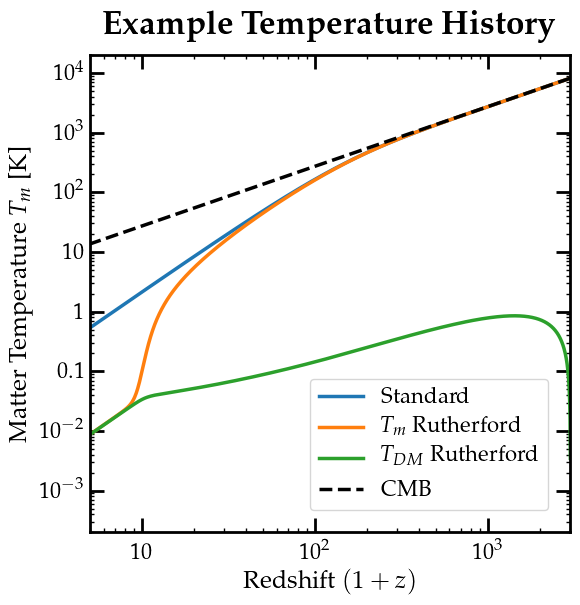

In [93]:
plt.figure()

ax = plt.gca()
ax.loglog()

Tm_std, = plt.plot(soln_std['rs'], soln_std['Tm']/phys.kB, label=r'Standard')
#Tm_swave, = plt.plot(soln_swave_NFW['rs'], soln_swave_NFW['Tm']/phys.kB, label=r'$s$-wave Annihilation')
#Tm_decay, = plt.plot(soln_decay2['rs'], soln_decay2['Tm']/phys.kB, label=r'Decay')
Tm_cooling, = plt.plot(soln_cooling['rs'], soln_cooling['Tm']/phys.kB, label=r'$T_m$ Rutherford')
TDM_cooling, = plt.plot(soln_cooling['rs'], soln_cooling['T_DM']/phys.kB, label=r'$T_{DM}$ Rutherford')
# plt.errorbar([18.2], [5.2], fmt="_", capsize=10, yerr=3, uplims=True, ecolor='Purple', linewidth=2.5)
# Tm_decoupling, = plt.plot(soln_decoupling['rs'], soln_decoupling['Tm']/phys.kB, label=r'$(1+z)_\mathrm{td} = 500$')
TCMB, = plt.plot(rs_vec, phys.TCMB(rs_vec)/phys.kB, 'k--', label='CMB')
# Tm_pwave, = plt.plot(soln_pwave['rs'], soln_pwave['Tm']/phys.kB, label=r'$p$-wave Annihilation')
# Tm_pwave_cooling, = plt.plot(soln_pwave_cooling['rs'], soln_pwave_cooling['Tm']/phys.kB, label=r'$p$-wave/Rutherford')
# Tm_boost, = plt.plot(tmp['rs'], tmp['Tm']/phys.kB, label=r'Everything')
# Tm_tmp, = plt.plot(tmp['rs'], tmp2['Tm']/phys.kB)
# Tm_tmp2, = plt.plot(tmp['rs'], tmp['T_DM']/phys.kB)



# Tm_pwave_cooling, = plt.plot(soln_pwave['rs'], soln_pwave['Tm']/phys.kB, label=r'$p$-wave and cooling')

plt.legend(handles=[Tm_std, Tm_cooling, TDM_cooling, TCMB], loc=4)
# plt.legend(handles=[Tm_std, Tm_swave, Tm_pwave, Tm_decay, Tm_cooling, TDM_cooling, Tm_pwave_cooling, Tm_boost, TCMB], loc=4)
# plt.legend(handles=[Tm_std, Tm_pwave, Tm_cooling, TDM_cooling, Tm_pwave_cooling, Tm_boost, Tm_tmp, TCMB], loc=4)

# plt.tick_params(axis='both', which='major', length=10, width=2, labelsize=20, direction='in', top=True, right=True)
# plt.tick_params(axis='both', which='minor', length=3, width=1, labelsize=20, direction='in', top=True, right=True)

plt.title(r'\bf{Example Temperature History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')
plt.axis([5, 3e3, 0.0002, 2e4])
# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/rutherford_example.pdf')

# Millicharge

## Compare to DH/21cm_pwave/Millicharged_DM.ipynb

In [63]:
%autoreload


mDM = 1e7
fDM = 1
n = -4

eps = 5e-6
inj_type = 'swave'
species = 'elec'
inj_param = 1e28*0
start_rs=2000

soln_swave_eps = main.evolve(
    DM_process=inj_type, mDM=mDM, primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=32, backreaction=False,
    struct_boost=None,
    end_rs=4.03,
    dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=eps
)

[4, 3000.0, 1e-05, 2]

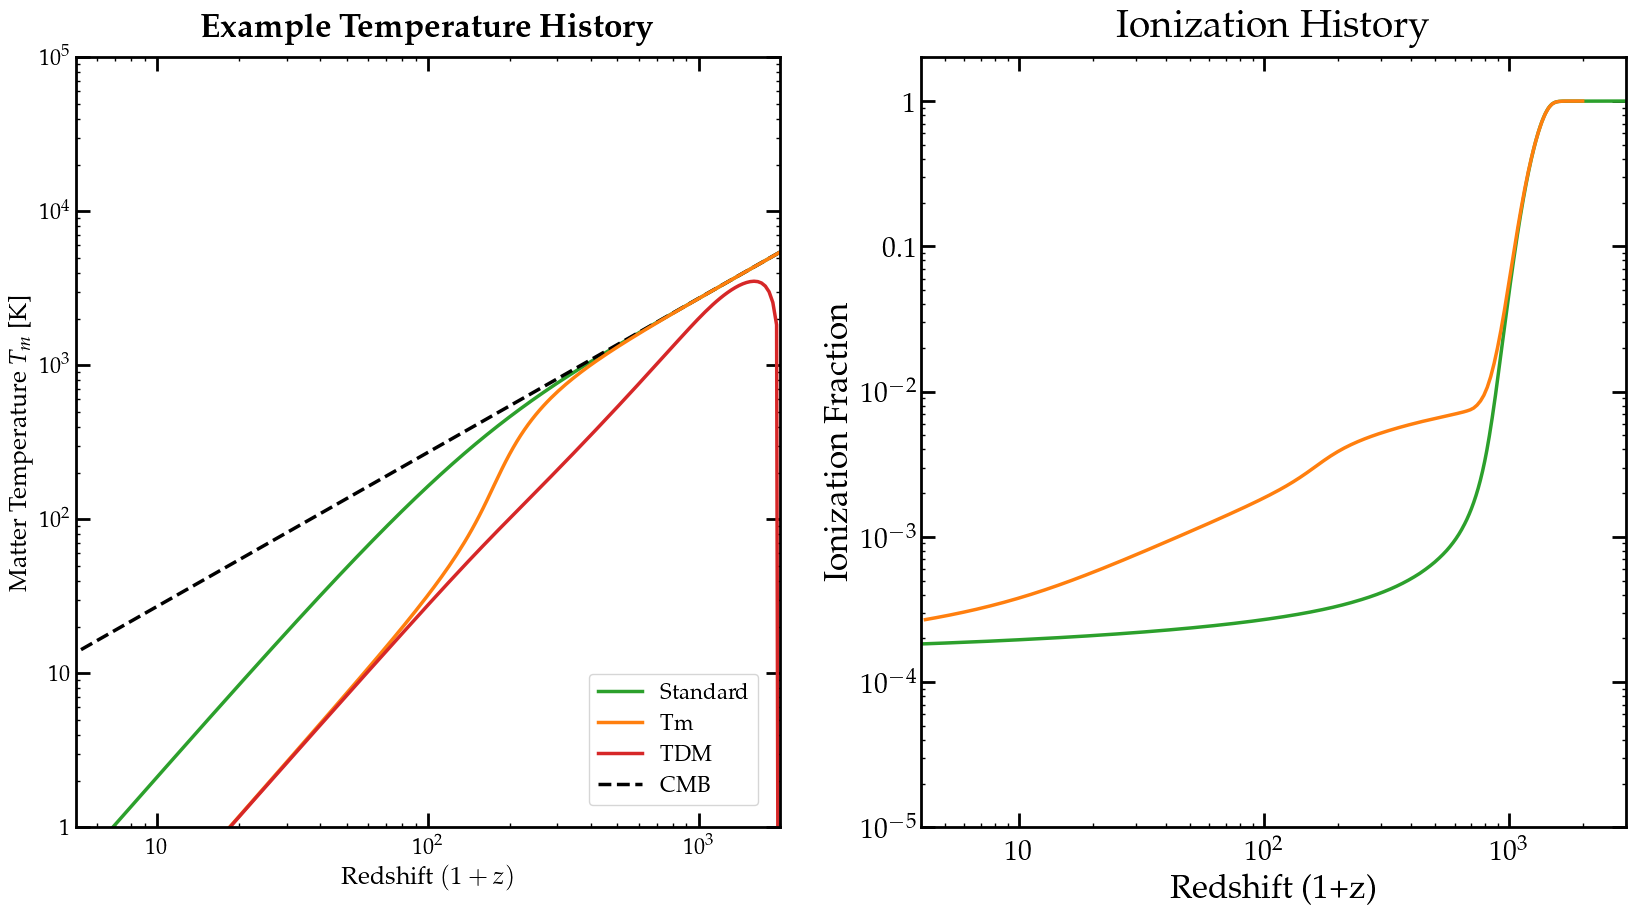

In [64]:
plt.figure(figsize=(20,10))

ax = plt.subplot(1,2,1)
plt.rc('text', usetex=True)
ax.loglog()

Tm_std, = plt.plot(soln_std['rs'], soln_std['Tm']/phys.kB, color='C2', label=r'Standard')
# Tm_cooling, = plt.plot(soln_cooling['rs'], soln_cooling['Tm']/phys.kB, label=r'$T_m$ Rutherford')
# TDM_cooling, = plt.plot(soln_cooling['rs'], soln_cooling['T_DM']/phys.kB, label=r'$T_{DM}$ Rutherford')
TCMB, = plt.plot(rs_vec, phys.TCMB(rs_vec)/phys.kB, 'k--', label='CMB')
plt_swave_eps_Tm, = plt.plot(soln_swave_eps['rs'], soln_swave_eps['Tm']/phys.kB, label='Tm', color='C1')
plt_swave_eps_TDM, = plt.plot(soln_swave_eps['rs'], soln_swave_eps['T_DM']/phys.kB, label='TDM', color='C3')

plt.legend(handles=[Tm_std, plt_swave_eps_Tm, plt_swave_eps_TDM, TCMB], loc=4)
plt.title(r'\bf{Example Temperature History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')
plt.axis([5, 2e3, 1, 1e5])
# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/rutherford_example.pdf')



ax = plt.subplot(1,2,2)
plt.rc('text', usetex=True)
ax.loglog()

plot_xHII_std,    = plt.plot(rs_vec, phys.xHII_std(rs_vec), 'C2', label='$\Lambda CDM$')
# plot_xHII_swave,    = plt.plot(soln_swave_NFW['rs'], soln_swave_NFW['x'][:,0], 'C1', label='s-wave annihilation')
plot_xHII_decay,    = plt.plot(soln_swave_eps['rs'], soln_swave_eps['x'][:,0], 'C1', label='decay')


plt.title(r'\bf{Ionization History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Hydrogen Ionization Fraction $x_\mathrm{HII}$')

plt.axis([4, 3e3, 1e-4, 1.5])

plt.tick_params(axis='both', which='major', labelsize=20)

plt.title(r'Ionization History', fontsize=28)
plt.xlabel('Redshift (1+z)',fontsize=24)
plt.ylabel('Ionization Fraction',fontsize=24)
plt.axis([4, 3e3, 1e-5, 2])

## Now compare to Figure 11 (d) of 1803.097539

We see if point ($m_{DM}$, $\epsilon$) = (10MeV, $4 \times 10^{-6}$) is ruled out as it should be, but ($m_{DM}$, $\epsilon$) = (10MeV, $5 \times 10^{-6}$) is not excluded.

In [75]:
%autoreload

mDM = 1e7
fDM = 1e-2
n = -4

eps = 4e-6
inj_type = 'swave'
species = 'phot'
inj_param = 1e28*0
start_rs=2000

soln_exc = main.evolve(
    DM_process=inj_type, mDM=mDM, primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=4, backreaction=False,
    struct_boost=None,
    end_rs=15,
    dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=eps
)


eps = 5e-6
soln_inc = main.evolve(
    DM_process=inj_type, mDM=mDM, primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=4, backreaction=False,
    struct_boost=None,
    end_rs=15,
    dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=eps
)

In [73]:
species = 'phot'

soln_exc_struct = main.evolve(
    DM_process=inj_type, mDM=mDM, primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=4, backreaction=False,
    struct_boost=struct_boost,
    end_rs=15,
    dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=eps
)


eps = 5e-6
soln_inc_struct = main.evolve(
    DM_process=inj_type, mDM=mDM, primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=4, backreaction=False,
    struct_boost=struct_boost,
    end_rs=15,
    dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=eps
)

[15, 20, 1, 20]

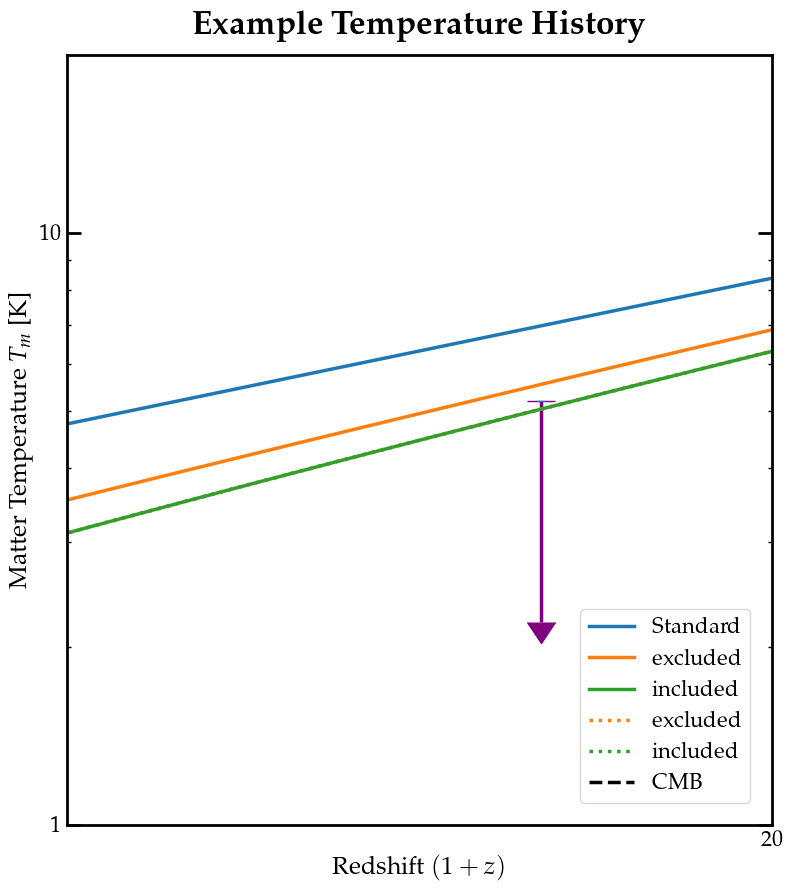

In [79]:
plt.figure(figsize=(20,10))

ax = plt.subplot(1,2,1)
plt.rc('text', usetex=True)
ax.loglog()

Tm_std, = plt.plot(soln_std['rs'], soln_std['Tm']/phys.kB, color='C0', label=r'Standard')

TCMB, = plt.plot(rs_vec, phys.TCMB(rs_vec)/phys.kB, 'k--', label='CMB')
plt_exc, = plt.plot(soln_exc['rs'], soln_exc['Tm']/phys.kB, label='excluded', color='C1')
plt_inc, = plt.plot(soln_inc['rs'], soln_inc['Tm']/phys.kB, label='included', color='C2')

plt_exc_struct, = plt.plot(soln_exc_struct['rs'], soln_exc_struct['Tm']/phys.kB, label='excluded', color='C1', linestyle = ':')
plt_inc_struct, = plt.plot(soln_inc_struct['rs'], soln_inc_struct['Tm']/phys.kB, label='included', color='C2', linestyle = ':')

plt.errorbar([18.2], [5.2], fmt="_", capsize=10, yerr=3, uplims=True, ecolor='Purple', linewidth=2.5)
plt.legend(handles=[Tm_std, plt_exc, plt_inc, plt_exc_struct, plt_inc_struct, TCMB], loc=4)
plt.title(r'\bf{Example Temperature History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')
plt.axis([15, 20, 1, 20])
# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/rutherford_example.pdf')

## pwave

Importance of thermal boost (search for fac in rate_func_eng and set it to 0)

In [105]:
%autoreload
mDM = 1e7
fDM = 1e-2
n = -4

eps = 8e-4
inj_type = 'pwave'
species = 'elec'
start_rs=3000
if species == 'elec':
    coarsen_factor=32
else:
    coarsen_factor=4

soln_pwave_eps = main.evolve(
    DM_process=inj_type, mDM=mDM, primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=coarsen_factor, backreaction=True,
    struct_boost=struct_boost_pwave,
    end_rs=15,
    dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=eps
)

In [81]:
%autoreload
soln_pwave_eps_noThermal = main.evolve(
    DM_process=inj_type, mDM=mDM, primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=coarsen_factor, backreaction=True,
    struct_boost=struct_boost_pwave,
    end_rs=15,
    dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=eps
)

[5, 2000.0, 1, 100000.0]

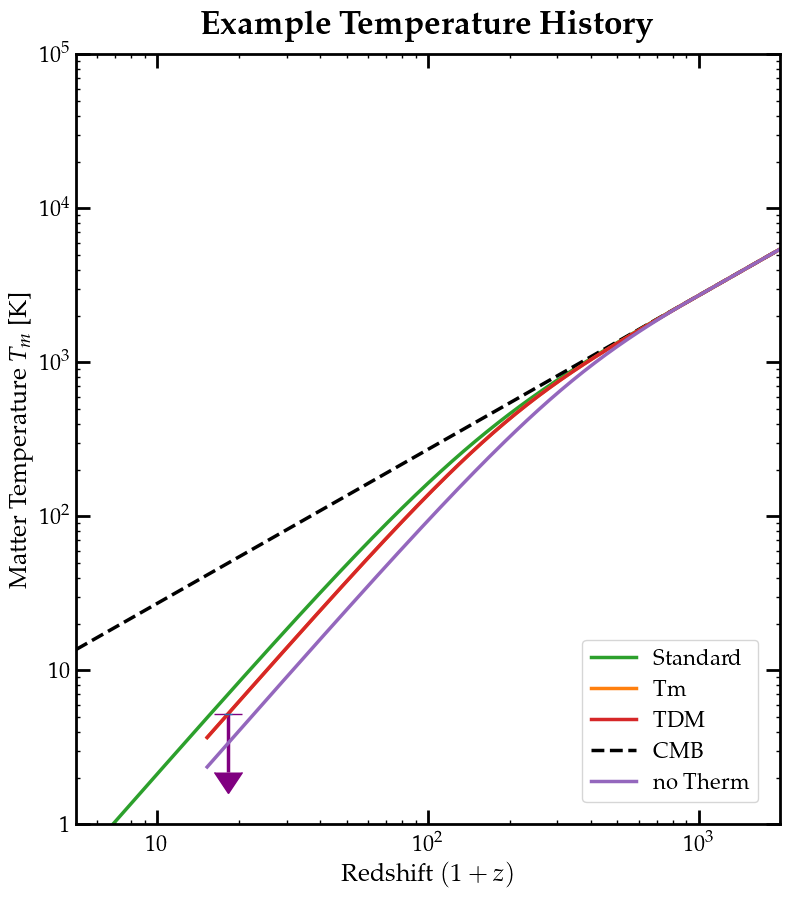

In [92]:
plt.figure(figsize=(20,10))

ax = plt.subplot(1,2,1)
plt.rc('text', usetex=True)
ax.loglog()

Tm_std, = plt.plot(soln_std['rs'], soln_std['Tm']/phys.kB, color='C2', label=r'Standard')
# Tm_cooling, = plt.plot(soln_cooling['rs'], soln_cooling['Tm']/phys.kB, label=r'$T_m$ Rutherford')
# TDM_cooling, = plt.plot(soln_cooling['rs'], soln_cooling['T_DM']/phys.kB, label=r'$T_{DM}$ Rutherford')
TCMB, = plt.plot(rs_vec, phys.TCMB(rs_vec)/phys.kB, 'k--', label='CMB')
plt_pwave_eps_Tm, = plt.plot(soln_pwave_eps['rs'], soln_pwave_eps['Tm']/phys.kB, label='Tm', color='C1')
plt_pwave_eps_TDM, = plt.plot(soln_pwave_eps['rs'], soln_pwave_eps['T_DM']/phys.kB, label='TDM', color='C3')
plt_pwave_eps_Tm_noThermal, = plt.plot(soln_pwave_eps_noThermal['rs'], soln_pwave_eps_noThermal['Tm']/phys.kB, label='no Therm', color='C4')

plt.errorbar([18.2], [5.2], fmt="_", capsize=10, yerr=3, uplims=True, ecolor='Purple', linewidth=2.5)

plt.legend(handles=[Tm_std, plt_pwave_eps_Tm, plt_pwave_eps_TDM, TCMB,
                   plt_pwave_eps_Tm_noThermal], loc=4)
plt.title(r'\bf{Example Temperature History}')
plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')
plt.axis([5, 2e3, 1, 1e5])
# plt.savefig('/Users/gregoryridgway/Desktop/DM/Talks/rutherford_example.pdf')

# Derive Constraints for p-wave model

In [24]:
%autoreload

fDM = 1e-2
n = -4
inj_type = 'pwave'
species = 'elec'
start_rs=3000

m_inc = .1
log10mDM_list = np.arange(6,8+m_inc-1e-10,m_inc)

eps_inc = .1
log10eps_list = np.arange(-6,-3+eps_inc-1e-10,eps_inc)

Tm_list = np.zeros((
    len(log10mDM_list),
    len(log10eps_list)
))

if species == 'elec':
    coarsen_factor=32
else:
    coarsen_factor=4

The loop

In [29]:
for i,log10mDM in enumerate(tqdm(log10mDM_list)):
    for j,log10eps in enumerate(tqdm(log10eps_list)):
        soln_pwave_eps = main.evolve(
            DM_process=inj_type, mDM=10**log10mDM, primary=species+'_delta',
            start_rs = start_rs,
            coarsen_factor=coarsen_factor, backreaction=True,
            struct_boost=struct_boost_pwave,
            end_rs=18.165,
            dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=10**log10eps
        )
        Tm_list[i,j] = soln_pwave_eps['Tm'][-1]/phys.kB
        
# Save the data
pickle.dump(
    [log10mDM_list, log10eps_list, Tm_list],
    open('/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plot_data/Tm_grid_pwave_'+species+'_fDM_1e-2_fine.dat','wb')
)

/Users/gridgway/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)



new_vals:  [[3.83851382e-01 3.83841713e-01 0.00000000e+00 9.97098565e-01
  4.77913473e-11 9.99998695e-13]
 [           nan            nan            nan            nan
             nan            nan]]
nan encountered, exiting.


../../darkhistory/history/tla_DM_baryon_scattering.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  xi = np.log(9*T_matter**3/(4*phys.hbar**3*phys.c**3*np.pi*eps**2*phys.alpha**3*xHII*phys.nH*rs**3))
../../darkhistory/history/tla_DM_baryon_scattering.py:130: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c
../../darkhistory/history/tla_DM_baryon_scattering.py:136: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c
../../darkhistory/history/tla_DM_baryon_scattering.py:143: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c
../../darkhistory/history/tla_DM_baryon_scattering.py:149: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c


../../darkhistory/history/tla_DM_baryon_scattering.py:117: RuntimeWarning: divide by zero encountered in log
  xi = np.log(9*T_matter**3/(4*phys.hbar**3*phys.c**3*np.pi*eps**2*phys.alpha**3*xHII*phys.nH*rs**3))


In [30]:
Tm_list_NoBR = np.zeros((
    len(log10mDM_list),
    len(log10eps_list)
))
for i,log10mDM in enumerate(tqdm(log10mDM_list)):
    for j,log10eps in enumerate(tqdm(log10eps_list)):
        soln_pwave_eps = main.evolve(
            DM_process=inj_type, mDM=10**log10mDM, primary=species+'_delta',
            start_rs = start_rs,
            coarsen_factor=coarsen_factor, backreaction=False,
            struct_boost=struct_boost_pwave,
            end_rs=18.165,
            dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=10**log10eps
        )
        Tm_list_NoBR[i,j] = soln_pwave_eps['Tm'][-1]/phys.kB
        
# Save the data
pickle.dump(
    [log10mDM_list, log10eps_list, Tm_list_NoBR],
    open('/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plot_data/Tm_grid_pwave_'+species+'_fDM_1e-2NoBR.dat','wb')
)

/Users/gridgway/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


new_vals:  [[3.83851382e-01 3.83841713e-01 0.00000000e+00 9.97098566e-01
  4.77913473e-11 9.99998695e-13]
 [           nan            nan            nan            nan
             nan            nan]]
nan encountered, exiting.


../../darkhistory/history/tla_DM_baryon_scattering.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  xi = np.log(9*T_matter**3/(4*phys.hbar**3*phys.c**3*np.pi*eps**2*phys.alpha**3*xHII*phys.nH*rs**3))
../../darkhistory/history/tla_DM_baryon_scattering.py:130: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c
../../darkhistory/history/tla_DM_baryon_scattering.py:136: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c
../../darkhistory/history/tla_DM_baryon_scattering.py:143: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c
../../darkhistory/history/tla_DM_baryon_scattering.py:149: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c


../../darkhistory/history/tla_DM_baryon_scattering.py:117: RuntimeWarning: overflow encountered in double_scalars
  xi = np.log(9*T_matter**3/(4*phys.hbar**3*phys.c**3*np.pi*eps**2*phys.alpha**3*xHII*phys.nH*rs**3))
../../darkhistory/history/tla_DM_baryon_scattering.py:117: RuntimeWarning: divide by zero encountered in log
  xi = np.log(9*T_matter**3/(4*phys.hbar**3*phys.c**3*np.pi*eps**2*phys.alpha**3*xHII*phys.nH*rs**3))


In [31]:
Tm_list_NoStruct = np.zeros((
    len(log10mDM_list),
    len(log10eps_list)
))
for i,log10mDM in enumerate(tqdm(log10mDM_list)):
    for j,log10eps in enumerate(tqdm(log10eps_list)):
        soln_pwave_eps = main.evolve(
            DM_process=inj_type, mDM=10**log10mDM, primary=species+'_delta',
            start_rs = start_rs,
            coarsen_factor=coarsen_factor, backreaction=False,
            struct_boost=struct_boost_pwave,
            end_rs=18.165,
            dm_baryon_switch=True, fDM=fDM, n=n, mcharge_switch=True, eps=10**log10eps
        )
        Tm_list_NoStruct[i,j] = soln_pwave_eps['Tm'][-1]/phys.kB
        
# Save the data
pickle.dump(
    [log10mDM_list, log10eps_list, Tm_list_NoStruct],
    open('/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plot_data/Tm_grid_pwave_'+species+'_fDM_1e-2NoStruct.dat','wb')
)

/Users/gridgway/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


new_vals:  [[3.83851382e-01 3.83841713e-01 0.00000000e+00 9.97098566e-01
  4.77913473e-11 9.99998695e-13]
 [           nan            nan            nan            nan
             nan            nan]]
nan encountered, exiting.


../../darkhistory/history/tla_DM_baryon_scattering.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  xi = np.log(9*T_matter**3/(4*phys.hbar**3*phys.c**3*np.pi*eps**2*phys.alpha**3*xHII*phys.nH*rs**3))
../../darkhistory/history/tla_DM_baryon_scattering.py:130: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c
../../darkhistory/history/tla_DM_baryon_scattering.py:136: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c
../../darkhistory/history/tla_DM_baryon_scattering.py:143: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c
../../darkhistory/history/tla_DM_baryon_scattering.py:149: RuntimeWarning: invalid value encountered in double_scalars
  )*phys.c


../../darkhistory/history/tla_DM_baryon_scattering.py:117: RuntimeWarning: overflow encountered in double_scalars
  xi = np.log(9*T_matter**3/(4*phys.hbar**3*phys.c**3*np.pi*eps**2*phys.alpha**3*xHII*phys.nH*rs**3))
../../darkhistory/history/tla_DM_baryon_scattering.py:117: RuntimeWarning: divide by zero encountered in log
  xi = np.log(9*T_matter**3/(4*phys.hbar**3*phys.c**3*np.pi*eps**2*phys.alpha**3*xHII*phys.nH*rs**3))


Make a contour plot

/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 620x620 with 0 Axes>

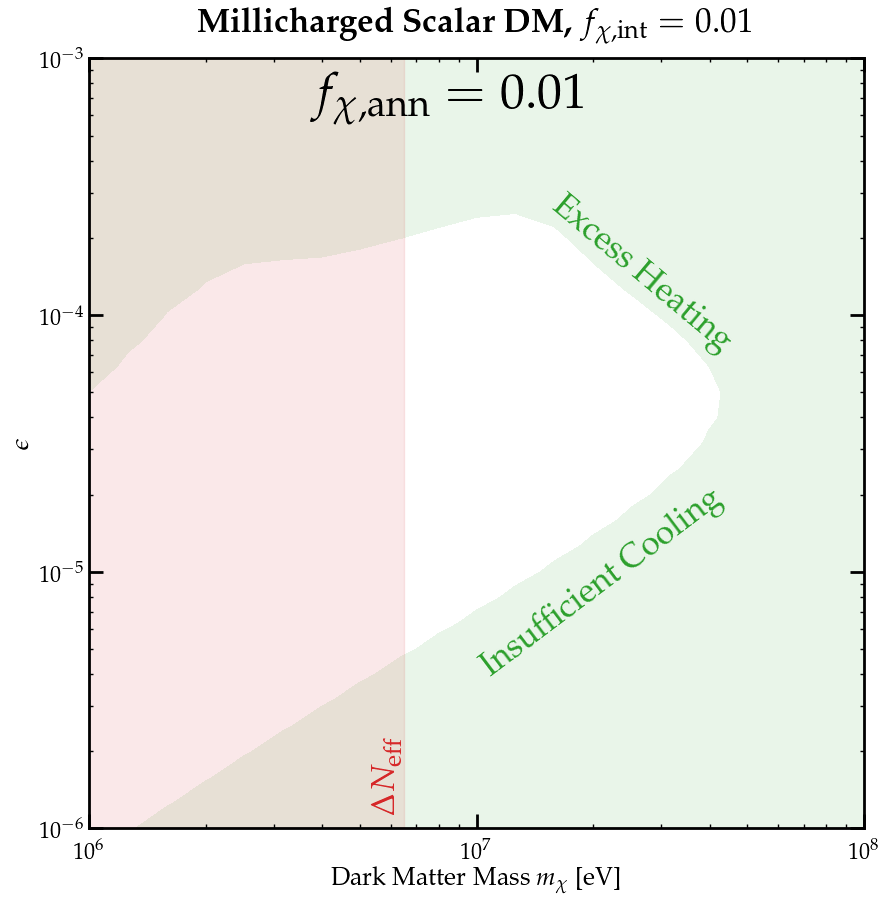

In [240]:
species = 'elec'
[log10mDM_list, log10eps_list, Tm_list_fine] = pickle.load(
    open('/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plot_data/Tm_grid_pwave_'+species+'_fDM_1e-2_fine.dat','rb')
)

plt.figure(figsize=(10,10))

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvspan(1e6, 6.5e6, color='C3', alpha=0.1)

plt.text(5.45e6, 1.8e-6, r'$\Delta N_\mathrm{eff}$', rotation=90, color='C3', fontsize=24)
plt.text(1e7, 1.8e-5, 'Insufficient Cooling', rotation=37, color='C2', fontsize=24)
plt.text(1.5e7, 2.5e-4, 'Excess Heating', color='C2', fontsize=24, rotation = -40)
plt.text(3.7e6, 6e-4, r'$f_{\chi,\mathrm{ann}} = 0.01$', fontsize=36)

lim_temp = plt.contourf(
    10**log10mDM_list, 10**log10eps_list, 
    np.transpose(Tm_list_fine)/4,
    levels=[1,1e10], colors=['C2'], alpha=0.1
)

plt.axis([1e6, 1e8, 1e-6, 1e-3])

plt.title(r'\bf{Millicharged Scalar DM}, $f_{\chi,\mathrm{int}} = 0.01$')
plt.ylabel(r'$\epsilon$')
plt.xlabel(r'Dark Matter Mass $m_\chi$ [eV]')

plt.savefig('/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plots/millicharged_pwave_exclusion.pdf')
plt.show()

/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


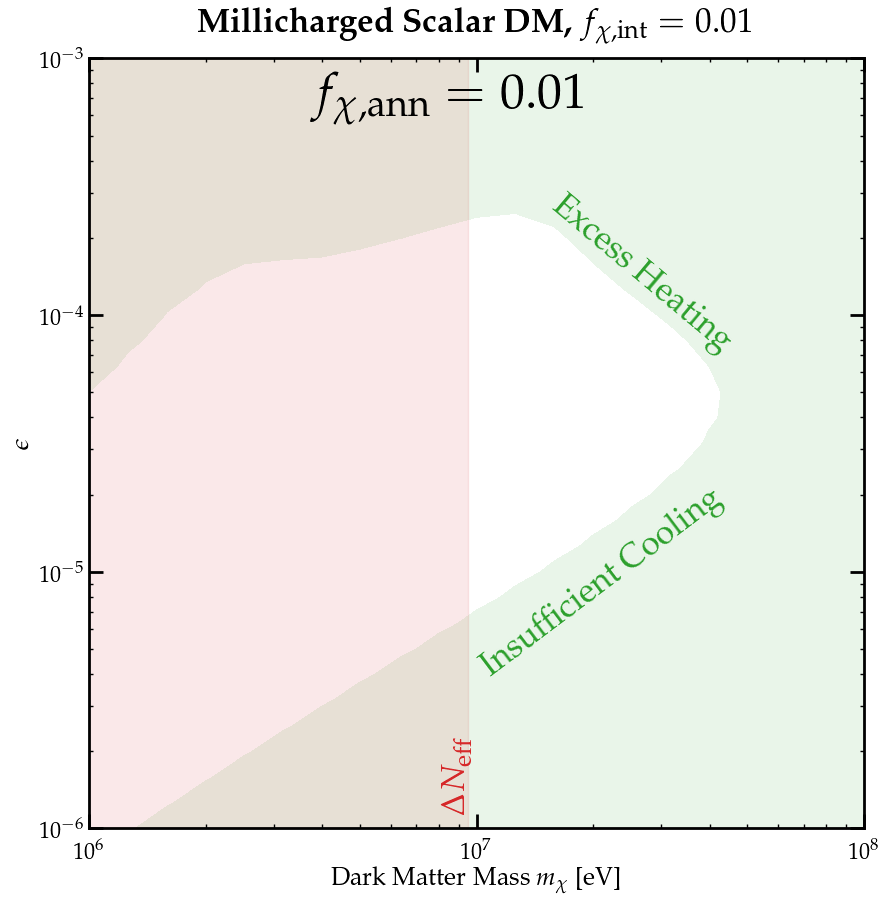

In [38]:
[log10mDM_list, log10eps_list, Tm_list_fine] = pickle.load(
    open('/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plot_data/Tm_grid_pwave_'+species+'_fDM_1e-2noStruct.dat','rb')
)

plt.figure(figsize=(10,10))

log10mDM_arr_fine = np.arange(6, 8, 0.01)
log10eps_arr_fine = np.arange(-6, -3, 0.01)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvspan(1e6, 9.5e6, color='C3', alpha=0.1)

plt.text(8.3e6, 1.8e-6, r'$\Delta N_\mathrm{eff}$', rotation=90, color='C3', fontsize=24)
plt.text(1e7, 1.8e-5, 'Insufficient Cooling', rotation=37, color='C2', fontsize=24)
plt.text(1.5e7, 2.5e-4, 'Excess Heating', color='C2', fontsize=24, rotation = -40)
plt.text(3.7e6, 6e-4, r'$f_{\chi,\mathrm{ann}} = 0.01$', fontsize=36)

lim_temp = plt.contourf(
    10**log10mDM_list, 10**log10eps_list, 
    np.transpose(Tm_list)/4,
    levels=[1,1e10], colors=['C2'], alpha=0.1
)

plt.axis([1e6, 1e8, 1e-6, 1e-3])

plt.title(r'\bf{Millicharged Scalar DM}, $f_{\chi,\mathrm{int}} = 0.01$')
plt.ylabel(r'$\epsilon$')
plt.xlabel(r'Dark Matter Mass $m_\chi$ [eV]')
plt.show()

In [ ]:
plt.figure()

log10mDM_arr_fine = np.arange(6, 8, 0.05)
log10eps_arr_fine = np.arange(-6, -3, 0.05)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvspan(1e6, 9.5e6, color='C3', alpha=0.1)

plt.text(8.3e6, 1.8e-6, r'$\Delta N_\mathrm{eff}$', rotation=90, color='C3', fontsize=24)
plt.text(1e7, 1.5e-5, 'Insufficient Cooling', rotation=40, color='C2', fontsize=24)
plt.text(1.1e7, 7e-5, 'Excess Heating', color='C2', fontsize=24)
plt.text(1.5e6, 6e-4, r'Annihilation, $e^+e^-$, $f_{\chi,\mathrm{ann}} = 0.01$', fontsize=36)

lim_millicharged = plt.contour(
    10**log10mDM_arr_fine, 10**log10eps_arr_fine, 
    log10sigmav(log10mDM_arr_fine, log10eps_arr_fine),
    # Need to change from Majorana to Dirac
    levels=[-26-np.log10(2), -25.5-np.log10(2), -25-np.log10(2), -24.5-np.log10(2)],
#     levels = [-33.5, -32.5, -31.5, -31],
    colors=['C0','C1','C3','C2']
)

lim_temp = plt.contourf(
    10**log10mDM_arr, 10**log10eps_arr, 
    np.transpose(T_IGM_with_elec_ann_arr)/4,
    levels=[1,1e10], colors=['C2'], alpha=0.1
)

plt.axis([1e6, 1e8, 1e-6, 1e-3])


# labels = {
#     -33.5:r'-33.5', 
#     -32.5:r'-32.5', 
#     -31.5:r'-31.5', 
#     -31:r'-31'
# }

labels = {
    -26-np.log10(2):r'-26', 
    -25.5-np.log10(2):r'-25.5', 
    -25-np.log10(2):r'-25', 
    -24.5-np.log10(2):r'-24.5'
}

plt.clabel(
    lim_millicharged, inline=True, fontsize=16, rightside_up=True,
    manual=[(5e6, 2e-5), (1e7, 1e-5), (2e7, 3e-5), (6e7, 5e-5)], fmt=labels
)

plt.title(r'\bf{Millicharged DM}, $f_{\chi,\mathrm{int}} = 0.01$')
plt.ylabel(r'$\epsilon$')
plt.xlabel(r'Dark Matter Mass $m_\chi$ [eV]')


plt.savefig('/Users/hongwan/Dropbox (MIT)/21cm_DM/drafts/PRD/v2/millicharged_elec_swave.pdf')

# Sensitivity plots

In [219]:
T_21 = -50
rs = 18 # We always define redshifts as 1 + z by convention in the code. 
one_minus_TR_over_TS = (T_21/23.) / (0.15 / phys.omega_m)**0.5 / (phys.omega_baryon*phys.h/0.02) / (rs/10)**0.5
Tm_max = 1/(1 - one_minus_TR_over_TS) * phys.TCMB(rs) / phys.kB # in K
print('The upper bound on Tm is: {:03.1f} K'.format(Tm_max))

The upper bound on Tm is: 20.3 K


In [230]:
%autoreload
direc='/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plot_data/'

fDM = 1
n = -4
inj_type = 'pwave'
species = 'elec'
start_rs=3000

m_inc = .1


sigmav_inc = -.1
if species == 'elec':
    log10sigmav_over_mDM_list = np.arange(-24,-33-1e-10,sigmav_inc)
    log10mDM_list = np.arange(6.01,12+m_inc-1e-10,m_inc)
else:
    log10sigmav_over_mDM_list = np.arange(-24,-31-1e-10,sigmav_inc)
    log10mDM_list = np.arange(4.01,12+m_inc-1e-10,m_inc)

Tm_list = 300.*np.ones((
    len(log10mDM_list),
    len(log10sigmav_over_mDM_list)
))

if species == 'elec':
    coarsen_factor=32
else:
    coarsen_factor=4

The loop

In [ ]:
%autoreload
get_his=True
rs_vec = 3000*np.exp(-.001 * np.arange(0,5107))

if not get_his:
    
    [log10mDM_list, log10sigmav_over_mDM_list, Tm_list] = pickle.load(
        open(direc+species+'_pwave_br_sensitivity_T21.dat','rb'))

    # inds = [np.where(Tm_list[k] == Tm_list[k][Tm_list[k]>7][-1])[0][0] for k in np.arange(len(Tm_list))]
    inds = [np.where(Tm_list[0]!=0)[0][0] for k in np.arange(len(Tm_list))]
    Tm_max=7.3
    
    print('###### Target Temperature: {:03.1f} K'.format(Tm_max), ' ######')

    for i, log10mDM in enumerate(tqdm(log10mDM_list)):

        print('****** log10(mDM): ', log10mDM, ' ******')
        mDM = 10**log10mDM

        below_target = False
        above_target = False
    #     if i==0:
    #         if species == 'elec':
    #             j = len(log10sigmav_over_mDM_list[log10sigmav_over_mDM_list>-25-6])
    #         else:
    #             j = len(log10sigmav_over_mDM_list[log10sigmav_over_mDM_list>-23-6])
        j = inds[i]+1

        while (
            not below_target or not above_target
        ):

    #         print('****************************')
            sigmav = 10**log10sigmav_over_mDM_list[j]*mDM

            
            soln = main.evolve(
                DM_process=inj_type, mDM=10**log10mDM, primary=species+'_delta', sigmav=sigmav,
                start_rs = start_rs,
                coarsen_factor=coarsen_factor, backreaction=True,
                struct_boost=struct_boost_pwave,
                end_rs=18.165,
                dm_baryon_switch=False, fDM=fDM, n=n, mcharge_switch=False, eps=None
            )
            Tm_list[i,j] = soln['Tm'][-1]/phys.kB
            print('sigmav: {:03.1e}'.format(sigmav), ' T(z = 17) w/ backreaction: {:03.1f} K'.format(Tm_list[i,j]))

            if Tm_list[i,j] <= Tm_max:

                below_target = True
                if not above_target:
                    # Below target T_m means we need a larger cross-section.
                    j -= 1

            elif Tm_list[i,j] >= Tm_max:

                above_target = True
                if not below_target:
                    # Above target T_m means we need a smaller cross-section. 
                    j += 1
else:
    print('###### Target Temperature: {:03.1f} K'.format(Tm_max), ' ######')

    for i, log10mDM in enumerate(tqdm(log10mDM_list)):

        print('****** log10(mDM): ', log10mDM, ' ******')
        mDM = 10**log10mDM
        for j, log10sigmav_over_mDM in enumerate(tqdm(np.flipud(log10sigmav_over_mDM_list))):
            
            sigmav = 10**log10sigmav_over_mDM*mDM

            soln = tla.get_history(
                rs_vec, baseline_f=True,
                inj_particle=species,
                DM_process='pwave', mDM=mDM, sigmav=sigmav,
                struct_boost=True
            )
            Tm_list[i,-j-1] = soln[-1,0]/phys.kB
            print('sigmav: {:03.1e}'.format(sigmav), ' T(z = 17) w/o backreaction: {:03.1f} K'.format(Tm_list[i,-j-1]))
            if Tm_list[i,-j-1] > 200:
                break

# Save the data that was just produced
# pickle.dump([log10mDM_list, log10sigmav_over_mDM_list, Tm_list], open(direc+species+'_pwave_br_sensitivity_T21_'+str(-T_21)+'.dat','wb'))
pickle.dump([log10mDM_list, log10sigmav_over_mDM_list, Tm_list], open(direc+species+'_pwave_br_sensitivity_T21.dat','wb'))


print('###### Calculation Complete! ######')           

###### Target Temperature: 20.3 K  ######


****** log10(mDM):  6.01  ******


sigmav: 1.0e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-27  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.6e-27  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-27  T(z = 17) w/o backreaction: 7.3 K
sigmav: 4.1e-27  T(z = 17) w/o backreaction: 7.4 K
sigmav: 5.1e-27  T(z = 17) w/o backreaction: 7.5 K
sigmav: 6.5e-27  T(z = 17) w/o backreaction: 7.6 K
sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.8 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 8.0 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 8.3 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 8.6 K



Exception in thread Thread-26:
Traceback (most recent call last):
  File "/Users/gridgway/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/gridgway/anaconda3/lib/python3.6/site-packages/tqdm-4.19.5-py3.6.egg/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/gridgway/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



sigmav: 2.0e-26  T(z = 17) w/o backreaction: 9.0 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 9.5 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 10.2 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 11.0 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 12.0 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 13.3 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 15.0 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 17.0 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 19.7 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 23.0 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 27.0 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 32.2 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 38.7 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 47.0 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 57.2 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 70.2 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 86.5 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 107.1 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 132.8 K
sigmav: 1.6e

sigmav: 1.3e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-27  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-27  T(z = 17) w/o backreaction: 7.2 K
sigmav: 4.1e-27  T(z = 17) w/o backreaction: 7.3 K
sigmav: 5.1e-27  T(z = 17) w/o backreaction: 7.3 K
sigmav: 6.5e-27  T(z = 17) w/o backreaction: 7.4 K
sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.6 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.8 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 8.1 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 8.3 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 8.7 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 9.2 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 9.7 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 10.4 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 11.2 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 12.3 K
sigmav: 1.0e-25  T(z = 17) w

sigmav: 1.6e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-27  T(z = 17) w/o backreaction: 7.2 K
sigmav: 4.1e-27  T(z = 17) w/o backreaction: 7.2 K
sigmav: 5.1e-27  T(z = 17) w/o backreaction: 7.2 K
sigmav: 6.5e-27  T(z = 17) w/o backreaction: 7.3 K
sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.4 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.6 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 8.1 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 8.4 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 8.8 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 9.2 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 9.8 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 10.5 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 11.4 K
sigmav: 1.3e-25  T(z = 17) w/

sigmav: 2.0e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 5.1e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-27  T(z = 17) w/o backreaction: 7.2 K
sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.6 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 8.1 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 8.4 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 8.8 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 9.3 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 9.8 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 10.6 K
sigmav: 1.6e-25  T(z = 17) w/o

sigmav: 2.6e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 5.1e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.6 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 8.1 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 8.4 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 8.8 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 9.2 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 9.8 K
sigmav: 2.0e-25  T(z = 17) w/o 

sigmav: 3.2e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.5 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 8.1 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 8.4 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 8.8 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 9.2 K
sigmav: 2.6e-25  T(z = 17) w/o 

sigmav: 4.1e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 7.6 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 7.7 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 7.9 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 8.1 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 8.4 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 8.8 K
sigmav: 3.2e-25  T(z = 17) w/o 

sigmav: 5.1e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 7.5 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 7.6 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 7.7 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 7.9 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 8.2 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 8.5 K
sigmav: 4.1e-25  T(z = 17) w/o 

sigmav: 6.5e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 7.5 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 7.6 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 7.7 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 7.9 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 8.2 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 8.5 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 8.9 K
sigmav: 5.1e-25  T(z = 17) w/o 

sigmav: 8.1e-27  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 7.6 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 7.7 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 7.9 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 8.1 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 8.4 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 8.8 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 9.3 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 9.9 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 10.6 K
sigmav: 6.5e-25  T(z = 17) w/o

sigmav: 1.0e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.5 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 8.1 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 8.4 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 8.7 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 9.2 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 9.7 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 10.4 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 11.3 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 12.4 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 13.8 K
sigmav: 8.1e-25  T(z = 17) 

sigmav: 1.3e-26  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.5 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.6 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.8 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 8.0 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 8.3 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 8.6 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 9.0 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 9.5 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 10.2 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 11.0 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 12.0 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 13.3 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 14.9 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 17.0 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 19.6 K
sigmav: 1.0e-24  T(z = 1

sigmav: 1.6e-26  T(z = 17) w/o backreaction: 7.3 K
sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.6 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 8.0 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 8.1 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 8.4 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 8.8 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 9.2 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 9.8 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 10.5 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 11.4 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 12.6 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 14.0 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 15.8 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 18.1 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 21.0 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 24.6 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 29.3 K
sigmav: 1.3e-24  T(z =

sigmav: 2.0e-26  T(z = 17) w/o backreaction: 7.4 K
sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.5 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 8.1 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 8.4 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 8.8 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 9.2 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 9.8 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 10.5 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 11.4 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 12.6 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 14.0 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 15.8 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 18.1 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 21.0 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 24.6 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 29.1 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 34.8 K
sigmav: 1.6e-24  T(z 

sigmav: 2.6e-26  T(z = 17) w/o backreaction: 7.5 K
sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 8.1 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 8.4 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 8.8 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 9.2 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 9.8 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 10.5 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 11.4 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 12.5 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 14.0 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 15.8 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 18.0 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 20.9 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 24.5 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 29.0 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 34.7 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 41.8 K
sigmav: 2.0e-24  T(z

sigmav: 3.2e-26  T(z = 17) w/o backreaction: 7.6 K
sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.8 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 8.0 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 8.2 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 8.6 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 9.0 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 9.5 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 10.1 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 10.9 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 11.9 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 13.2 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 14.8 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 16.8 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 19.3 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 22.5 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 26.5 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 31.5 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 37.9 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 45.8 K
sigmav: 2.6e-24  T(

sigmav: 4.1e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 8.1 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 8.4 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 8.7 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 9.1 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 9.7 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 10.4 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 11.2 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 12.3 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 13.7 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 15.4 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 17.6 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 20.4 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 23.8 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 28.1 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 33.6 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 40.5 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 49.1 K
sigmav: 3.2e-24  T(

sigmav: 5.1e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 6.5e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 8.1 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 8.4 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 8.8 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 9.2 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 9.8 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 10.5 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 11.4 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 12.6 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 14.0 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 15.8 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 18.1 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 20.9 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 24.5 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 29.1 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 34.8 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 42.0 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 51.0 K
sigmav: 4.1e-24  T(

sigmav: 6.5e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 8.1e-26  T(z = 17) w/o backreaction: 7.9 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 8.1 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 8.5 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 8.8 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 9.2 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 9.8 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 10.6 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 11.5 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 12.6 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 14.1 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 15.9 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 18.2 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 21.1 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 24.7 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 29.3 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 35.1 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 42.3 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 51.4 K
sigmav: 5.1e-24  T(

sigmav: 8.1e-26  T(z = 17) w/o backreaction: 7.7 K
sigmav: 1.0e-25  T(z = 17) w/o backreaction: 7.9 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 8.1 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 8.4 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 8.8 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 9.2 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 9.8 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 10.5 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 11.4 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 12.5 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 14.0 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 15.8 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 18.1 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 20.9 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 24.5 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 29.1 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 34.7 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 41.9 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 50.9 K
sigmav: 6.5e-24  T(

sigmav: 1.0e-25  T(z = 17) w/o backreaction: 7.7 K
sigmav: 1.3e-25  T(z = 17) w/o backreaction: 7.9 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 8.0 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 8.3 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 8.6 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 9.1 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 9.6 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 10.3 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 11.1 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 12.1 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 13.4 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 15.1 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 17.2 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 19.8 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 23.2 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 27.3 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 32.5 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 39.1 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 47.4 K
sigmav: 8.1e-24  T(

sigmav: 1.3e-25  T(z = 17) w/o backreaction: 7.6 K
sigmav: 1.6e-25  T(z = 17) w/o backreaction: 7.7 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 7.9 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 8.2 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 8.5 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 8.9 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 9.4 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 10.0 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 10.7 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 11.7 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 12.9 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 14.4 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 16.4 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 18.8 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 21.8 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 25.7 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 30.5 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 36.5 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 44.2 K
sigmav: 1.0e-23  T(

sigmav: 1.6e-25  T(z = 17) w/o backreaction: 7.5 K
sigmav: 2.0e-25  T(z = 17) w/o backreaction: 7.6 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 7.8 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 8.0 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 8.3 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 8.6 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 9.0 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 9.5 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 10.1 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 10.9 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 12.0 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 13.2 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 14.8 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 16.9 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 19.4 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 22.7 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 26.7 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 31.7 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 38.1 K
sigmav: 1.3e-23  T(z

sigmav: 2.0e-25  T(z = 17) w/o backreaction: 7.4 K
sigmav: 2.6e-25  T(z = 17) w/o backreaction: 7.5 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 7.7 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 7.8 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 8.0 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 8.3 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 8.6 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 9.1 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 9.6 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 10.3 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 11.1 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 12.2 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 13.5 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 15.2 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 17.3 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 20.0 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 23.3 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 27.5 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 32.8 K
sigmav: 1.6e-23  T(z 

sigmav: 2.6e-25  T(z = 17) w/o backreaction: 7.3 K
sigmav: 3.2e-25  T(z = 17) w/o backreaction: 7.4 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 7.5 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 7.7 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 7.8 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 8.1 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 8.4 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 8.7 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 9.1 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 9.7 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 10.4 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 11.3 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 12.3 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 13.7 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 15.4 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 17.6 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 20.4 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 23.8 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 28.2 K
sigmav: 2.0e-23  T(z =

sigmav: 3.2e-25  T(z = 17) w/o backreaction: 7.3 K
sigmav: 4.1e-25  T(z = 17) w/o backreaction: 7.3 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 7.5 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 7.5 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 7.7 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 7.9 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 8.1 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 8.4 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 8.8 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 9.2 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 9.7 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 10.5 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 11.3 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 12.5 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 13.9 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 15.6 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 17.9 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 20.7 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 24.2 K
sigmav: 2.6e-23  T(z = 

sigmav: 4.1e-25  T(z = 17) w/o backreaction: 7.2 K
sigmav: 5.1e-25  T(z = 17) w/o backreaction: 7.3 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 7.4 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 7.4 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 7.5 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 7.7 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 7.9 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 8.1 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 8.4 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 8.8 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 9.3 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 9.8 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 10.5 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 11.4 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 12.6 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 14.0 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 15.8 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 18.1 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 20.9 K
sigmav: 3.2e-23  T(z = 1

sigmav: 5.1e-25  T(z = 17) w/o backreaction: 7.2 K
sigmav: 6.5e-25  T(z = 17) w/o backreaction: 7.2 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 7.4 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 7.5 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 7.6 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 7.8 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 7.9 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 8.2 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 8.4 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 8.8 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 9.2 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 9.8 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 10.6 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 11.5 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 12.6 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 14.1 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 15.9 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 18.2 K
sigmav: 4.1e-23  T(z = 17

sigmav: 6.5e-25  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-25  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 7.4 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 7.5 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 7.6 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 7.7 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 7.9 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 8.1 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 8.4 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 8.8 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 9.3 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 9.8 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 10.6 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 11.5 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 12.7 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 14.1 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 16.0 K
sigmav: 5.1e-23  T(z = 17)

sigmav: 8.1e-25  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 7.3 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 7.4 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 7.5 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 7.6 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 7.7 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.9 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 8.2 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 8.4 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 8.8 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 9.3 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 9.9 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 10.6 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 11.5 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 12.7 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 14.2 K
sigmav: 6.5e-23  T(z = 17) 

sigmav: 1.0e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 7.3 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 7.4 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 7.5 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.6 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.7 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.9 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 8.1 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 8.5 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 8.9 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 9.3 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 9.9 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 10.7 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 11.6 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 12.8 K
sigmav: 8.1e-23  T(z = 17) w

sigmav: 1.3e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 7.3 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.4 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.5 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.6 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.7 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.9 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 8.2 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 8.5 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 8.9 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 9.3 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 9.9 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 10.7 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 11.6 K
sigmav: 1.0e-22  T(z = 17) w/

sigmav: 1.6e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.4 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.5 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.6 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.7 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.9 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 8.2 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 8.6 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 8.9 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 9.4 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 10.0 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 10.7 K
sigmav: 1.3e-22  T(z = 17) w/

sigmav: 2.0e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.4 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.5 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.6 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.8 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.9 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 8.2 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 8.5 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 8.9 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 9.4 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 10.0 K
sigmav: 1.6e-22  T(z = 17) w/o

sigmav: 2.6e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.3 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.4 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.5 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.6 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.8 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.9 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 8.2 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 8.5 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 9.0 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 9.4 K
sigmav: 2.0e-22  T(z = 17) w/o 

sigmav: 3.2e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.3 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.4 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.5 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.6 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.8 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 8.0 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 8.2 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 8.5 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 8.9 K
sigmav: 2.6e-22  T(z = 17) w/o 

sigmav: 4.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.3 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.4 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.5 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.6 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.8 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 8.0 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 8.2 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 8.5 K
sigmav: 3.2e-22  T(z = 17) w/o 

sigmav: 5.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.4 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.5 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.6 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.8 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 8.0 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 8.2 K
sigmav: 4.1e-22  T(z = 17) w/o 

sigmav: 6.5e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.4 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.5 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.6 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.8 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 8.0 K
sigmav: 5.1e-22  T(z = 17) w/o 

sigmav: 8.1e-24  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.3 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.4 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.5 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 7.6 K
sigmav: 5.1e-22  T(z = 17) w/o backreaction: 7.8 K
sigmav: 6.5e-22  T(z = 17) w/o 

sigmav: 1.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.3 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 7.4 K
sigmav: 5.1e-22  T(z = 17) w/o backreaction: 7.5 K
sigmav: 6.5e-22  T(z = 17) w/o backreaction: 7.6 K
sigmav: 8.1e-22  T(z = 17) w/o 

sigmav: 1.3e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 5.1e-22  T(z = 17) w/o backreaction: 7.3 K
sigmav: 6.5e-22  T(z = 17) w/o backreaction: 7.4 K
sigmav: 8.1e-22  T(z = 17) w/o backreaction: 7.5 K
sigmav: 1.0e-21  T(z = 17) w/o 

sigmav: 1.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 5.1e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 6.5e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 8.1e-22  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.0e-21  T(z = 17) w/o backreaction: 7.4 K
sigmav: 1.3e-21  T(z = 17) w/o 

sigmav: 2.0e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 5.1e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-22  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.0e-21  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.3e-21  T(z = 17) w/o backreaction: 7.3 K
sigmav: 1.6e-21  T(z = 17) w/o 

sigmav: 2.6e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 6.5e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-21  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.3e-21  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.6e-21  T(z = 17) w/o backreaction: 7.3 K
sigmav: 2.0e-21  T(z = 17) w/o 

sigmav: 3.2e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 8.1e-22  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.0e-21  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-21  T(z = 17) w/o backreaction: 7.2 K
sigmav: 1.6e-21  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.0e-21  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.6e-21  T(z = 17) w/o 

sigmav: 4.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-21  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.3e-21  T(z = 17) w/o backreaction: 7.1 K
sigmav: 1.6e-21  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-21  T(z = 17) w/o backreaction: 7.2 K
sigmav: 2.6e-21  T(z = 17) w/o backreaction: 7.2 K
sigmav: 3.2e-21  T(z = 17) w/o 

sigmav: 5.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-23  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.0e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 2.6e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 3.2e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 4.1e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 5.1e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 6.5e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 8.1e-22  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.0e-21  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.3e-21  T(z = 17) w/o backreaction: 7.0 K
sigmav: 1.6e-21  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.0e-21  T(z = 17) w/o backreaction: 7.1 K
sigmav: 2.6e-21  T(z = 17) w/o backreaction: 7.1 K
sigmav: 3.2e-21  T(z = 17) w/o backreaction: 7.1 K
sigmav: 4.1e-21  T(z = 17) w/o 

In [218]:
pickle.dump([log10mDM_list, log10sigmav_over_mDM_list, Tm_list], open(direc+species+'_pwave_br_sensitivity_T21_noBR.dat','wb'))

Now plot data

In [104]:
T_21 = -300
T_R = 90 #phys.TCMB(rs) / phys.kB # in K

rs = 18 # We always define redshifts as 1 + z by convention in the code. 
one_minus_TR_over_TS = (T_21/23.) / (0.15 / phys.omega_m)**0.5 / (phys.omega_baryon*phys.h/0.02) / (rs/10)**0.5
Tm_max = 1/(1 - one_minus_TR_over_TS) * T_R
print('The upper bound on Tm is: {:03.1f} K'.format(Tm_max))

The upper bound on Tm is: 9.5 K


In [108]:
species = 'phot'
direc='/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plot_data/'
[log10mDM_list, log10sigmav_over_mDM_list, Tm_list] = pickle.load(
    open(direc+species+'_pwave_br_sensitivity_T21.dat','rb'))

inds = [np.where(Tm_list[k] == Tm_list[k][Tm_list[k]>7][-1])[0][0] for k in np.arange(len(Tm_list))]

In [109]:
def get_log10_max_xsec(log10_sigmav_over_m_arr, Tm_arr, max_Tm):
    """Returns the log10 maximum sigma v over m from temperature calculations.
    
    Parameters
    ----------
    log10_lifetime_arr : ndarray
        Abscissa of log10 sigma v over m's used, in increasing order.
    Tm_arr : ndarray
        Computed matter temperature for each entry in lifetime_arr. 
    max_Tm : float
        The maximum Tm allowed at this point. 
        
    Returns
    -------
    ndarray
        The interpolated minimum lifetime. 
    
    """
    # Find the first index at which we have Tm < max_Tm in Tm_arr. 
    below = np.where((Tm_arr > 0) & (Tm_arr < max_Tm))[0][0]
    # Since increasing lifetime decreases Tm, the next index must
    # lie below max_Tm.
    above = below-1
    
    # Obtain the two temperature values. 
    Ts = [Tm_arr[below], Tm_arr[above]]
    # Obtain the two log10 lifetime values. 
    log10_xsecs = [log10_sigmav_over_m_arr[below], log10_sigmav_over_m_arr[above]]
    
    # Perform a linear interpolation.
    return (np.diff(log10_xsecs)/np.diff(Ts)*(max_Tm-Ts[0]) + log10_xsecs[0])[0]

In [110]:
if species == 'phot':
    max_xsec_phot90 = np.array(
        [get_log10_max_xsec(log10sigmav_over_mDM_list + log10mDM_list[i], row, Tm_max) for i,row in enumerate(Tm_list)]
    )
elif species == 'elec':
    max_xsec_elec90 = np.array(
        [get_log10_max_xsec(log10sigmav_over_mDM_list + log10mDM_list[i], row, Tm_max) for i,row in enumerate(Tm_list)]
    )
else:
    raise ValueError('invalid particle species')

/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


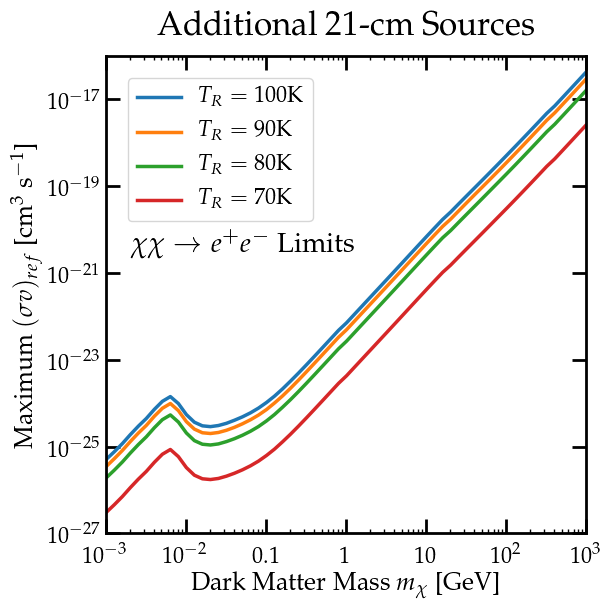

In [122]:
plt.figure()

plt.loglog()
species='elec'

if species == 'elec':
#     plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_elec), label=r'$T_{21} =$ '+str(T_21)+'K')
    plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_elec), label=r'$T_R = 100$K')
    plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_elec90), label=r'$T_R = 90$K')
    plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_elec80), label=r'$T_R = 80$K')
    plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_elec70), label=r'$T_R = 70$K')
else:
#     plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_phot), label=r'$T_{21} =$ '+str(T_21)+'K')
    plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_phot), label=r'$T_R = 100$K')
    plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_phot90), label=r'$T_R = 90$K')
    plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_phot80), label=r'$T_R = 80$K')
    plt.plot(10**log10mDM_list/10**9, 10**(max_xsec_phot70), label=r'$T_R = 70$K')

if species == 'phot':
    plt.axis([1e-3,1e3,1e-25,1.5e-14])
else:
    plt.axis([1e-3,1e3,1e-27,1e-16])

if species == 'phot':
    plt.text(2e-3, 3e-19, r'$\chi\chi \to \gamma \gamma$ Limits', fontsize=20)
else:
    plt.text(2e-3, 3e-21, r'$\chi\chi \to e^+e^-$ Limits', fontsize=20)
plt.ylabel(r'Maximum $(\sigma v)_{ref}$ [cm$^3$ s$^{-1}$]')
plt.xlabel(r'Dark Matter Mass $m_\chi$ [GeV]')
plt.legend()
plt.title(r'Additional 21-cm Sources')
# plt.savefig('/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plots/sensitivity_'+species+'.pdf')
plt.savefig('/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plots/Additional_Sources_'+species+'.pdf')
plt.show()

/Users/gridgway/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


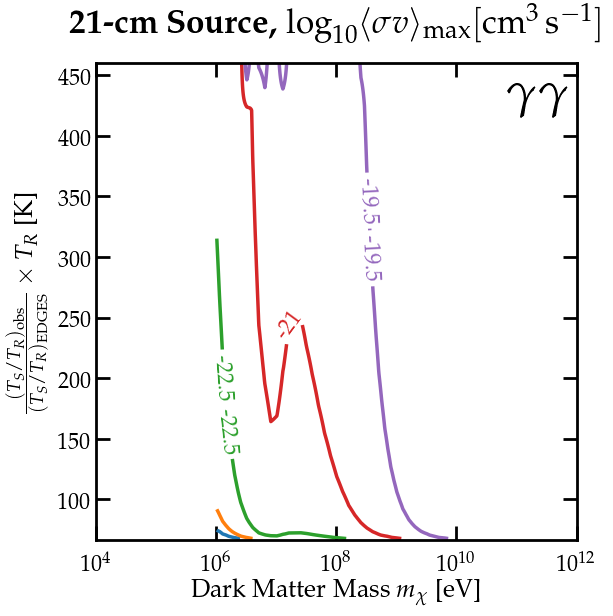

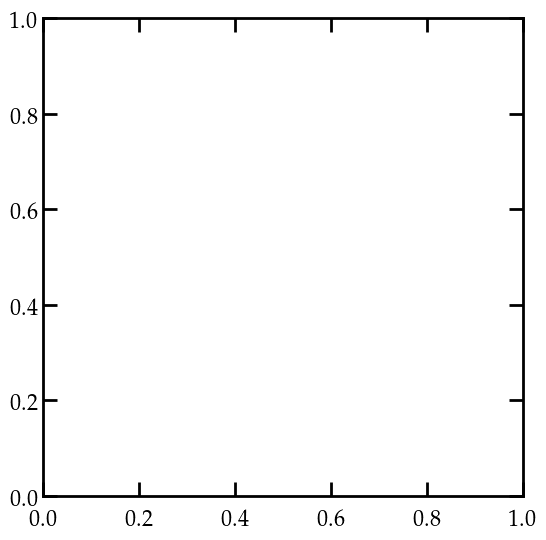

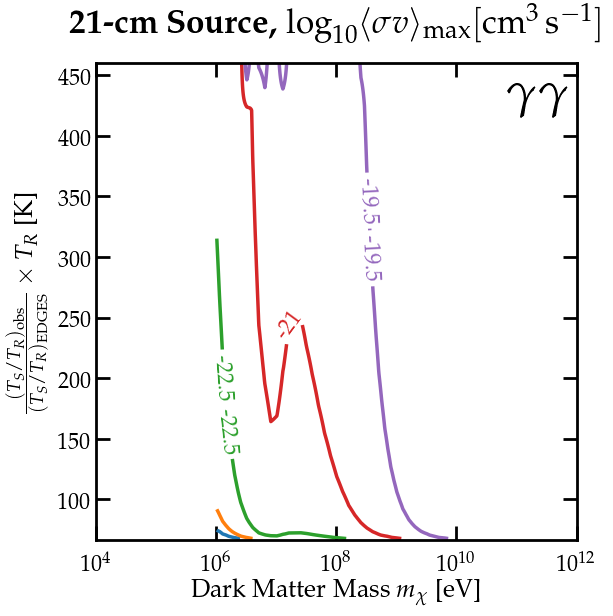

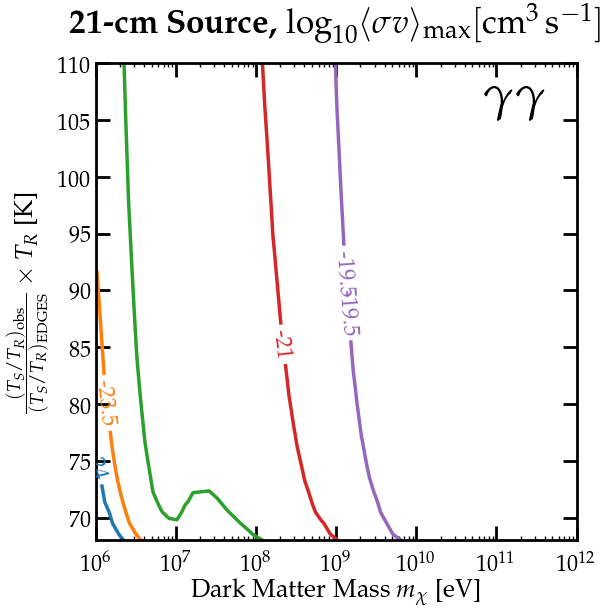

In [165]:
T_IGM_arr = np.arange(7.1, 50.+0.1, 0.1)
log10sigmav_arr = np.zeros((log10mDM_list.size, T_IGM_arr.size))

for i,log10mDM in enumerate(log10mDM_list):
    sigmav_over_mDM_interp = interp1d(
        Tm_list[i,:], log10sigmav_over_mDM_list, 
        bounds_error = False,
        fill_value = (0, 100)
    )
    log10sigmav_arr[i,:] = sigmav_over_mDM_interp(T_IGM_arr) + log10mDM

log10sigmav = interp2d(log10mDM_list, T_IGM_arr, np.transpose(log10sigmav_arr), kind='cubic')

log10mDM_arr_fine = np.log10(10**np.arange(6, 12.05, 0.05))

plt.figure()

lim_phot = plt.contour(
    10**log10mDM_list, T_IGM_arr/0.105, 
    log10sigmav(log10mDM_list, T_IGM_arr), 
    [-25.5, -24, -23.5, -22.5, -21, -19.5],
    #np.array([-44, -40, -37, -35, -34, -33]),
    colors=['C0','C1','C2','C3','C4','C5']
)

labels = {
    -25.5:r'-25.5', 
    -24:r'-24',
    -23.5:r'-23.5',
    -22.5:r'-22.5',
    -21:r'-21',
    -19.5:r'-19.5'}

ax = plt.gca()
ax.set_xscale('log')

plt.text(
    7e10, 425, 
    r'$\gamma \gamma$', 
    color='black', fontsize=36)

plt.title(r'\bf{21-cm Source}, $\log_{10}\langle \sigma v \rangle_{\max} [\mathrm{cm}^3 \, \mathrm{ s}^{-1}]$')
plt.xlabel(r'Dark Matter Mass $m_\chi$ [eV]')
plt.ylabel(r'$\frac{(T_S/T_R)_\mathrm{obs}}{(T_S/T_R)_\mathrm{EDGES}} \times T_R$ [K]')
plt.axis([1e4, 1e12, 66, 460])

plt.clabel(
    lim_phot, inline=True, fontsize=16, 
    manual=[(1e5, 150), (1e6, 200), (1e7, 250), (1e9, 300), (1e10, 350)],fmt=labels
)

# plt.savefig('/Users/'+user+'/Dropbox (MIT)/21cm_pwave/plots/source_phot_pwave.pdf')
###############################################################################################################
plt.figure()

lim_phot = plt.contour(
    10**log10mDM_list, T_IGM_arr/0.105, 
    log10sigmav(log10mDM_list, T_IGM_arr),
    [-25.5, -24, -23.5, -22.5, -21, -19.5],
    #np.array([-44, -40, -37, -35, -34, -32]),
    colors=['C0','C1','C2','C3','C4','C5']
)

labels = {
    -25.5:r'-25.5', 
    -24:r'-24',
    -23.5:r'-23.5',
    -22.5:r'-22.5',
    -21:r'-21',
    -19.5:r'-19.5'}

ax = plt.gca()
ax.set_xscale('log')

plt.text(
    7e10, 106, 
    r'$\gamma \gamma$', 
    color='black', fontsize=36)

plt.title(r'\bf{21-cm Source}, $\log_{10}\langle \sigma v \rangle_{\max} [\mathrm{cm}^3 \, \mathrm{ s}^{-1}]$')
plt.xlabel(r'Dark Matter Mass $m_\chi$ [eV]')
plt.ylabel(r'$\frac{(T_S/T_R)_\mathrm{obs}}{(T_S/T_R)_\mathrm{EDGES}} \times T_R$ [K]')
plt.axis([1e6, 1e12, 68, 110])

plt.clabel(
    lim_phot, inline=True, fontsize=16, 
    manual=[(1e5, 75), (1e6, 80), (1e8, 85), (1e9, 88), (1e10, 92)], fmt=labels
)

# plt.savefig('/Users/'+user+'/Dropbox (MIT)/21cm_pwave/plots/source_phot_pwave_zoom.pdf')
plt.show()

# Early Thermal Decoupling

In [27]:
T_21 = -300
rs = 18
T_R = phys.TCMB(rs) / phys.kB # in K
 
one_minus_TR_over_TS = (T_21/23.) / (0.15 / phys.omega_m)**0.5 / (phys.omega_baryon*phys.h/0.02) / (rs/10)**0.5
Tm_max = 1/(1 - one_minus_TR_over_TS) * T_R
print('The upper bound on Tm is: {:03.1f} K'.format(Tm_max))

The upper bound on Tm is: 5.2 K


In [36]:
%autoreload
direc='/Users/gridgway/Dropbox (MIT)/21cm_pwave/08_13_2019/plot_data/'

fDM = 1
n = -4
inj_type = 'pwave'
species = 'elec'
start_rs=1000

m_inc = .1
log10mDM_list = np.arange(6.01,12+m_inc-1e-10,m_inc)

sigmav_inc = -.1
log10sigmav_over_mDM_list = np.arange(-23,-45-1e-10,sigmav_inc)

Tm_list = np.zeros((
    len(log10mDM_list),
    len(log10sigmav_over_mDM_list)
))

if species == 'elec':
    coarsen_factor=32
else:
    coarsen_factor=4

In [38]:
%autoreload
z_td=750

print('###### Target Temperature: {:03.1f} K'.format(Tm_max), ' ######')

for i, log10mDM in enumerate(tqdm(log10mDM_list)):
    
    print('****** log10(mDM): ', log10mDM, ' ******')
    mDM = 10**log10mDM
    
    below_target = False
    above_target = False
    if i==0:
        if species == 'elec':
            j = len(log10sigmav_over_mDM_list[log10sigmav_over_mDM_list>-25-6])
        else:
            j = len(log10sigmav_over_mDM_list[log10sigmav_over_mDM_list>-23-6])
#     j = inds[i]+1
    
    while (
        not below_target or not above_target
    ):

#         print('****************************')
        sigmav = 10**log10sigmav_over_mDM_list[j]*mDM
    
        soln = main.evolve(
            DM_process=inj_type, mDM=10**log10mDM, primary=species+'_delta', sigmav=sigmav,
            start_rs = start_rs,
            coarsen_factor=coarsen_factor, backreaction=True,
            struct_boost=struct_boost_pwave,
            end_rs=18.165,
            dm_baryon_switch=False, fDM=fDM, n=n, mcharge_switch=False, eps=None, z_td=z_td
        )
        Tm_list[i,j] = soln['Tm'][-1]/phys.kB
        
        print('sigmav: {:03.1e}'.format(sigmav), ' T(z = 17) w/ backreaction: {:03.1f} K'.format(Tm_list[i,j]))
             
        if Tm_list[i,j] <= Tm_max:
            
            below_target = True
            if not above_target:
                # Below target T_m means we need a larger cross-section.
                j -= 1
            
        elif Tm_list[i,j] >= Tm_max:
            
            above_target = True
            if not below_target:
                # Above target T_m means we need a smaller cross-section. 
                j += 1

# Save the data that was just produced
# pickle.dump([log10mDM_list, log10sigmav_over_mDM_list, Tm_list], open(direc+species+'_pwave_br_sensitivity_T21_'+str(-T_21)+'.dat','wb'))
pickle.dump([log10mDM_list, log10sigmav_over_mDM_list, Tm_list], open(direc+species+'_pwave_br_z_kd_'+str(z_td)+'.dat','wb'))


print('###### Calculation Complete! ######')           

###### Target Temperature: 5.2 K  ######


****** log10(mDM):  6.01  ******


sigmav: 1.0e-25  T(z = 17) w/ backreaction: 8.5 K


sigmav: 8.1e-26  T(z = 17) w/ backreaction: 6.9 K


sigmav: 6.5e-26  T(z = 17) w/ backreaction: 5.7 K


sigmav: 5.1e-26  T(z = 17) w/ backreaction: 4.7 K
****** log10(mDM):  6.109999999999999  ******


sigmav: 6.5e-26  T(z = 17) w/ backreaction: 4.2 K


sigmav: 8.1e-26  T(z = 17) w/ backreaction: 4.9 K


sigmav: 1.0e-25  T(z = 17) w/ backreaction: 6.0 K
****** log10(mDM):  6.209999999999999  ******


sigmav: 1.3e-25  T(z = 17) w/ backreaction: 5.1 K


sigmav: 1.6e-25  T(z = 17) w/ backreaction: 6.1 K
****** log10(mDM):  6.309999999999999  ******


sigmav: 2.0e-25  T(z = 17) w/ backreaction: 5.0 K


sigmav: 2.6e-25  T(z = 17) w/ backreaction: 6.0 K
****** log10(mDM):  6.409999999999998  ******


sigmav: 3.2e-25  T(z = 17) w/ backreaction: 5.1 K


sigmav: 4.1e-25  T(z = 17) w/ backreaction: 6.1 K
****** log10(mDM):  6.509999999999998  ******


sigmav: 5.1e-25  T(z = 17) w/ backreaction: 5.3 K


sigmav: 4.1e-25  T(z = 17) w/ backreaction: 4.4 K
****** log10(mDM):  6.609999999999998  ******


sigmav: 5.1e-25  T(z = 17) w/ backreaction: 3.7 K


sigmav: 6.5e-25  T(z = 17) w/ backreaction: 4.3 K


sigmav: 8.1e-25  T(z = 17) w/ backreaction: 5.2 K


sigmav: 1.0e-24  T(z = 17) w/ backreaction: 6.2 K
****** log10(mDM):  6.709999999999997  ******


sigmav: 1.3e-24  T(z = 17) w/ backreaction: 5.3 K


sigmav: 1.0e-24  T(z = 17) w/ backreaction: 4.4 K
****** log10(mDM):  6.809999999999997  ******


sigmav: 1.3e-24  T(z = 17) w/ backreaction: 4.4 K


sigmav: 1.6e-24  T(z = 17) w/ backreaction: 5.2 K
****** log10(mDM):  6.909999999999997  ******


sigmav: 2.0e-24  T(z = 17) w/ backreaction: 8.7 K


sigmav: 1.6e-24  T(z = 17) w/ backreaction: 7.1 K


sigmav: 1.3e-24  T(z = 17) w/ backreaction: 5.9 K


sigmav: 1.0e-24  T(z = 17) w/ backreaction: 4.9 K
****** log10(mDM):  7.009999999999996  ******


sigmav: 1.3e-24  T(z = 17) w/ backreaction: 9.8 K


sigmav: 1.0e-24  T(z = 17) w/ backreaction: 7.9 K


sigmav: 8.1e-25  T(z = 17) w/ backreaction: 6.5 K


sigmav: 6.5e-25  T(z = 17) w/ backreaction: 5.4 K


sigmav: 5.1e-25  T(z = 17) w/ backreaction: 4.5 K
****** log10(mDM):  7.109999999999996  ******


sigmav: 6.5e-25  T(z = 17) w/ backreaction: 7.5 K


sigmav: 5.1e-25  T(z = 17) w/ backreaction: 6.2 K


sigmav: 4.1e-25  T(z = 17) w/ backreaction: 5.1 K
****** log10(mDM):  7.2099999999999955  ******


sigmav: 5.1e-25  T(z = 17) w/ backreaction: 7.3 K


sigmav: 4.1e-25  T(z = 17) w/ backreaction: 6.0 K


sigmav: 3.2e-25  T(z = 17) w/ backreaction: 5.0 K
****** log10(mDM):  7.309999999999995  ******


sigmav: 4.1e-25  T(z = 17) w/ backreaction: 6.2 K


sigmav: 3.2e-25  T(z = 17) w/ backreaction: 5.1 K
****** log10(mDM):  7.409999999999995  ******


sigmav: 4.1e-25  T(z = 17) w/ backreaction: 5.9 K


sigmav: 3.2e-25  T(z = 17) w/ backreaction: 4.9 K
****** log10(mDM):  7.5099999999999945  ******


sigmav: 4.1e-25  T(z = 17) w/ backreaction: 5.3 K


sigmav: 3.2e-25  T(z = 17) w/ backreaction: 4.5 K
****** log10(mDM):  7.609999999999994  ******


sigmav: 4.1e-25  T(z = 17) w/ backreaction: 4.7 K


sigmav: 5.1e-25  T(z = 17) w/ backreaction: 5.7 K
****** log10(mDM):  7.709999999999994  ******


sigmav: 6.5e-25  T(z = 17) w/ backreaction: 5.9 K


sigmav: 5.1e-25  T(z = 17) w/ backreaction: 4.9 K
****** log10(mDM):  7.809999999999993  ******


sigmav: 6.5e-25  T(z = 17) w/ backreaction: 4.9 K


sigmav: 8.1e-25  T(z = 17) w/ backreaction: 6.0 K
****** log10(mDM):  7.909999999999993  ******


sigmav: 1.0e-24  T(z = 17) w/ backreaction: 5.9 K


sigmav: 8.1e-25  T(z = 17) w/ backreaction: 4.9 K
****** log10(mDM):  8.009999999999993  ******


sigmav: 1.0e-24  T(z = 17) w/ backreaction: 4.6 K


sigmav: 1.3e-24  T(z = 17) w/ backreaction: 5.6 K
****** log10(mDM):  8.109999999999992  ******


sigmav: 1.6e-24  T(z = 17) w/ backreaction: 5.1 K


sigmav: 2.0e-24  T(z = 17) w/ backreaction: 6.1 K
****** log10(mDM):  8.209999999999992  ******


sigmav: 2.6e-24  T(z = 17) w/ backreaction: 5.4 K


sigmav: 2.0e-24  T(z = 17) w/ backreaction: 4.5 K
****** log10(mDM):  8.309999999999992  ******


sigmav: 2.6e-24  T(z = 17) w/ backreaction: 3.9 K


sigmav: 3.2e-24  T(z = 17) w/ backreaction: 4.7 K


sigmav: 4.1e-24  T(z = 17) w/ backreaction: 5.7 K
****** log10(mDM):  8.409999999999991  ******


sigmav: 5.1e-24  T(z = 17) w/ backreaction: 4.8 K


sigmav: 6.5e-24  T(z = 17) w/ backreaction: 5.8 K
****** log10(mDM):  8.509999999999991  ******


sigmav: 8.1e-24  T(z = 17) w/ backreaction: 4.9 K


sigmav: 1.0e-23  T(z = 17) w/ backreaction: 5.9 K
****** log10(mDM):  8.60999999999999  ******


sigmav: 1.3e-23  T(z = 17) w/ backreaction: 4.9 K


sigmav: 1.6e-23  T(z = 17) w/ backreaction: 5.9 K
****** log10(mDM):  8.70999999999999  ******


sigmav: 2.0e-23  T(z = 17) w/ backreaction: 4.9 K


sigmav: 2.6e-23  T(z = 17) w/ backreaction: 5.9 K
****** log10(mDM):  8.80999999999999  ******


sigmav: 3.2e-23  T(z = 17) w/ backreaction: 4.9 K


sigmav: 4.1e-23  T(z = 17) w/ backreaction: 6.0 K
****** log10(mDM):  8.90999999999999  ******


sigmav: 5.1e-23  T(z = 17) w/ backreaction: 4.9 K


sigmav: 6.5e-23  T(z = 17) w/ backreaction: 6.0 K
****** log10(mDM):  9.00999999999999  ******


sigmav: 8.1e-23  T(z = 17) w/ backreaction: 5.2 K


sigmav: 6.5e-23  T(z = 17) w/ backreaction: 4.3 K
****** log10(mDM):  9.109999999999989  ******


sigmav: 8.1e-23  T(z = 17) w/ backreaction: 3.7 K


sigmav: 1.0e-22  T(z = 17) w/ backreaction: 4.3 K


sigmav: 1.3e-22  T(z = 17) w/ backreaction: 5.2 K
****** log10(mDM):  9.209999999999988  ******


sigmav: 1.6e-22  T(z = 17) w/ backreaction: 4.3 K


sigmav: 2.0e-22  T(z = 17) w/ backreaction: 5.2 K
****** log10(mDM):  9.309999999999988  ******


sigmav: 2.6e-22  T(z = 17) w/ backreaction: 4.4 K


sigmav: 3.2e-22  T(z = 17) w/ backreaction: 5.2 K
****** log10(mDM):  9.409999999999988  ******


sigmav: 4.1e-22  T(z = 17) w/ backreaction: 4.4 K


sigmav: 5.1e-22  T(z = 17) w/ backreaction: 5.2 K
****** log10(mDM):  9.509999999999987  ******


sigmav: 6.5e-22  T(z = 17) w/ backreaction: 4.4 K


sigmav: 8.1e-22  T(z = 17) w/ backreaction: 5.2 K
****** log10(mDM):  9.609999999999987  ******


sigmav: 1.0e-21  T(z = 17) w/ backreaction: 4.4 K


sigmav: 1.3e-21  T(z = 17) w/ backreaction: 5.3 K
****** log10(mDM):  9.709999999999987  ******


sigmav: 1.6e-21  T(z = 17) w/ backreaction: 4.4 K


sigmav: 2.0e-21  T(z = 17) w/ backreaction: 5.3 K
****** log10(mDM):  9.809999999999986  ******


sigmav: 2.6e-21  T(z = 17) w/ backreaction: 4.4 K


sigmav: 3.2e-21  T(z = 17) w/ backreaction: 5.3 K
****** log10(mDM):  9.909999999999986  ******


sigmav: 4.1e-21  T(z = 17) w/ backreaction: 4.4 K


sigmav: 5.1e-21  T(z = 17) w/ backreaction: 5.3 K
****** log10(mDM):  10.009999999999986  ******


sigmav: 6.5e-21  T(z = 17) w/ backreaction: 4.4 K


sigmav: 8.1e-21  T(z = 17) w/ backreaction: 5.3 K
****** log10(mDM):  10.109999999999985  ******


sigmav: 1.0e-20  T(z = 17) w/ backreaction: 4.4 K


sigmav: 1.3e-20  T(z = 17) w/ backreaction: 5.3 K
****** log10(mDM):  10.209999999999985  ******


sigmav: 1.6e-20  T(z = 17) w/ backreaction: 4.5 K


sigmav: 2.0e-20  T(z = 17) w/ backreaction: 5.4 K
****** log10(mDM):  10.309999999999985  ******


sigmav: 2.6e-20  T(z = 17) w/ backreaction: 4.7 K


sigmav: 3.2e-20  T(z = 17) w/ backreaction: 5.7 K
****** log10(mDM):  10.409999999999984  ******


sigmav: 4.1e-20  T(z = 17) w/ backreaction: 4.8 K


sigmav: 5.1e-20  T(z = 17) w/ backreaction: 5.8 K
****** log10(mDM):  10.509999999999984  ******


sigmav: 6.5e-20  T(z = 17) w/ backreaction: 4.9 K


sigmav: 8.1e-20  T(z = 17) w/ backreaction: 6.0 K
****** log10(mDM):  10.609999999999983  ******


sigmav: 1.0e-19  T(z = 17) w/ backreaction: 5.1 K


sigmav: 1.3e-19  T(z = 17) w/ backreaction: 6.1 K
****** log10(mDM):  10.709999999999983  ******


sigmav: 1.6e-19  T(z = 17) w/ backreaction: 5.2 K


sigmav: 1.3e-19  T(z = 17) w/ backreaction: 4.4 K
****** log10(mDM):  10.809999999999983  ******


sigmav: 1.6e-19  T(z = 17) w/ backreaction: 3.8 K


sigmav: 2.0e-19  T(z = 17) w/ backreaction: 4.5 K


sigmav: 2.6e-19  T(z = 17) w/ backreaction: 5.3 K
****** log10(mDM):  10.909999999999982  ******


sigmav: 3.2e-19  T(z = 17) w/ backreaction: 4.6 K


sigmav: 4.1e-19  T(z = 17) w/ backreaction: 5.5 K
****** log10(mDM):  11.009999999999982  ******


sigmav: 5.1e-19  T(z = 17) w/ backreaction: 4.7 K


sigmav: 6.5e-19  T(z = 17) w/ backreaction: 5.6 K
****** log10(mDM):  11.109999999999982  ******


sigmav: 8.1e-19  T(z = 17) w/ backreaction: 4.7 K


sigmav: 1.0e-18  T(z = 17) w/ backreaction: 5.7 K
****** log10(mDM):  11.209999999999981  ******


sigmav: 1.3e-18  T(z = 17) w/ backreaction: 4.8 K


sigmav: 1.6e-18  T(z = 17) w/ backreaction: 5.8 K
****** log10(mDM):  11.309999999999981  ******


sigmav: 2.0e-18  T(z = 17) w/ backreaction: 4.9 K


sigmav: 2.6e-18  T(z = 17) w/ backreaction: 5.9 K
****** log10(mDM):  11.40999999999998  ******


sigmav: 3.2e-18  T(z = 17) w/ backreaction: 4.9 K


sigmav: 4.1e-18  T(z = 17) w/ backreaction: 5.9 K
****** log10(mDM):  11.50999999999998  ******


sigmav: 5.1e-18  T(z = 17) w/ backreaction: 4.9 K


sigmav: 6.5e-18  T(z = 17) w/ backreaction: 6.0 K
****** log10(mDM):  11.60999999999998  ******


sigmav: 8.1e-18  T(z = 17) w/ backreaction: 5.2 K


sigmav: 6.5e-18  T(z = 17) w/ backreaction: 4.3 K
****** log10(mDM):  11.70999999999998  ******


sigmav: 8.1e-18  T(z = 17) w/ backreaction: 3.7 K


sigmav: 1.0e-17  T(z = 17) w/ backreaction: 4.3 K


sigmav: 1.3e-17  T(z = 17) w/ backreaction: 5.2 K
****** log10(mDM):  11.80999999999998  ******


sigmav: 1.6e-17  T(z = 17) w/ backreaction: 4.4 K


sigmav: 2.0e-17  T(z = 17) w/ backreaction: 5.2 K
****** log10(mDM):  11.909999999999979  ******


sigmav: 2.6e-17  T(z = 17) w/ backreaction: 4.4 K


sigmav: 3.2e-17  T(z = 17) w/ backreaction: 5.2 K
****** log10(mDM):  12.009999999999978  ******


sigmav: 4.1e-17  T(z = 17) w/ backreaction: 4.4 K


sigmav: 5.1e-17  T(z = 17) w/ backreaction: 5.2 K

###### Calculation Complete! ######


# f_std data

In [93]:
user = '/Users/gridgway'
direc = user+'/Dropbox (MIT)/Photon Deposition/idl_comparison/GR_Checks/ih_continuous_'

In [94]:
f_std_data = pickle.load(open(user+'/Dropbox (MIT)/Photon Deposition/f_std_data/f_std_data.p','rb'))

In [95]:
labels = ['phot_decay', 'elec_decay',
          'phot_swave_einasto', 'elec_swave_einasto',
          'phot_swave_noStruct', 'elec_swave_noStruct',
          'phot_swave_NFW', 'elec_swave_NFW',
          'phot_pwave_NFW', 'elec_pwave_NFW']
# f_extended_data = {label : np.zeros((40,6620,5)) for label in labels}
f_extended_data = {label : None for label in labels}

In [96]:
for label in labels:
    if label == 'phot_pwave_NFW':
#         f_extended_data[label] = np.zeros((40,1655,5))
        f_extended_data[label] = np.zeros((40,6620,5))
    elif label == 'elec_pwave_NFW':
#         f_extended_data[label] = np.zeros((40,206,5))
        f_extended_data[label] = np.zeros((40,6620,5))
    else:
        f_extended_data[label] = f_std_data[label]
        
# for label in labels:
#     if (label != 'phot_pwave_NFW') and (label != 'elec_pwave_NFW'):
#         f_extended_data[label] = f_std_data[label]

In [97]:
# Input energy abscissa
log10eng0 = 3.6989700794219966
log10eng = np.array([log10eng0 + 0.23252559*i for i in np.arange(40)])
log10eng[-1] = 12.601505994846297

In [98]:
def save_as_pickled_object(obj, filepath):
    """
    This is a defensive way to write pickle.write, allowing for very large files on all platforms
    """
    max_bytes = 2**31 - 1
    bytes_out = pickle.dumps(obj)
    n_bytes = sys.getsizeof(bytes_out)
    with open(filepath, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

In [99]:
%autoreload

for label in tqdm(labels[-2:]):
    print(label)
    for i,eng in enumerate(tqdm(log10eng)):
        #injection energy, DM mass, center-of-mass energy
        if label[:4] == 'elec':
            mass = phys.me
            pri = 'elec'
            coarsen_factor=1
        else:
            mass = 0
            pri = 'phot'
            coarsen_factor=1
        
        Einj = 10**log10eng[i]
        mDM = Einj + mass
        DM_process='pwave'

        struct_func = phys.struct_boost_func(model='pwave_NFW_no_subs')

            
        DH_run = main.evolve(
            primary = pri+'_delta',
            DM_process=DM_process, mDM=mDM, lifetime=3e25, sigmav=3e-25,
            start_rs = 3000, end_rs=4.004,
            coarsen_factor=coarsen_factor, backreaction=False,
            struct_boost=struct_func
        )

        f_extended_data[label][i] = np.swapaxes(np.array(
            [DH_run['f']['low'][channel]  + DH_run['f']['high'][channel] 
            for channel in ['H ion', 'He ion', 'exc', 'heat', 'cont']]
        ),0,1)
        
    save_as_pickled_object(f_extended_data, user+'/Dropbox (MIT)/Photon Deposition/f_std_data/f_std_data_with_pwave_09_19_2019.p')

phot_pwave_NFW


elec_pwave_NFW


/Users/gridgway/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


# Scratch

In [ ]:
inj_param = 3e-24
soln_pwave = main.evolve(
    DM_process='pwave', mDM=1e8, sigmav=inj_param, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=4.004,
    dm_baryon_switch=False, xsec=0, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [76]:
%autoreload
mDM = 1e8
fDM = 1
n = -4

# real scattering cross section is xsec*v**-n/mu**2
mu_p = mDM*1.22*phys.mp/(mDM + 1.22*phys.mp)
xsec = 3e-43*mu_p**2

rs_start = 3000
rs_vec = 1 + np.arange(0,rs_start-0.5,0.5)
rs_vec = np.flipud(rs_vec)

V_pec_0 = 3e-4*0

inj_param = 1e-26

soln_pwave_cooling = main.evolve(
    DM_process='pwave', mDM=mDM, sigmav=inj_param, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=16,
    dm_baryon_switch=True, xsec=xsec, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [129]:
soln_std = main.evolve(
    DM_process='pwave', mDM=mDM, sigmav=inj_param*1e-40, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=4.004,
    dm_baryon_switch=True, xsec=xsec*1e-40, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [138]:
soln_cooling = main.evolve(
    DM_process='pwave', mDM=mDM, sigmav=inj_param*1e-40, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=None,
    end_rs=4.004,
    dm_baryon_switch=True, xsec=xsec, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [142]:
%autoreload
inj_param = 1e-26
soln_thermal_boost = main.evolve(
    DM_process='pwave', mDM=mDM, sigmav=inj_param, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=None,
    end_rs=4.004,
    dm_baryon_switch=True, xsec=xsec, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [153]:
%autoreload
inj_param = 1e-26
soln_pwave = main.evolve(
    DM_process='pwave', mDM=mDM, sigmav=inj_param, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=4.004,
    dm_baryon_switch=False, xsec=xsec, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [166]:
%autoreload
inj_param = 1e-26
soln_pwave_cooling = main.evolve(
    DM_process='pwave', mDM=mDM, sigmav=inj_param, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=4.004,
    dm_baryon_switch=True, xsec=xsec, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

In [257]:
%autoreload
inj_param = 1e-26
soln_total2 = main.evolve(
    DM_process='pwave', mDM=mDM, sigmav=inj_param, primary='elec_delta',
    start_rs = rs_start,
    coarsen_factor=32, backreaction=False,
    struct_boost=struct_boost_pwave,
    end_rs=4.004,
    dm_baryon_switch=True, xsec=xsec, fDM=fDM, n=n, mcharge_switch=False, eps=0
)

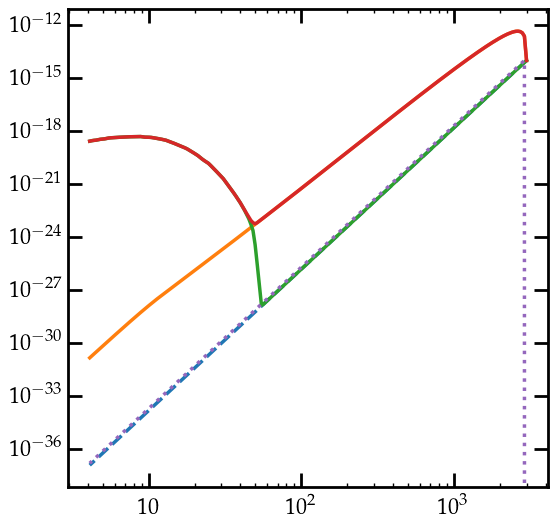

In [261]:
plt.figure()
ax = plt.gca()
ax.loglog()
plt.plot(soln_cooling['rs'], phys.inj_rate('pwave', soln_cooling['rs'], mDM=mDM, sigmav=inj_param),  linestyle='--')
plt.plot(soln_cooling['rs'], phys.inj_rate('pwave', soln_cooling['rs'], mDM=mDM, sigmav=inj_param)*fac)
plt.plot(soln_cooling['rs'], phys.inj_rate('pwave', soln_cooling['rs'], mDM=mDM, sigmav=inj_param)*struct_boost_pwave(soln_cooling['rs']))
plt.plot(soln_cooling['rs'], phys.inj_rate('pwave', soln_cooling['rs'], mDM=mDM, sigmav=inj_param)*(
    fac-1+struct_boost_pwave(soln_cooling['rs'])))
# plt.plot(soln_cooling['rs'], phys.inj_rate('pwave', soln_cooling['rs'], mDM=mDM, sigmav=inj_param)*(
#     fac*struct_boost_pwave(soln_cooling['rs'])), color='C0')
plt.plot(soln_total['rs'], soln_total['V_pec'], linestyle=':')
# plt.plot(soln_total['rs'], soln_total['V_pec'], linestyle=':')
# plt.plot(soln_total['rs'], soln_pwave['V_pec'], color='C1')